In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import _functions_sql as fs
import numpy as np
import seaborn as sns

In [8]:
import matplotlib
from matplotlib import font_manager
font_dirs = ["/Users/cornelialutz/Library/Fonts"]  # The path to the custom font file.
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [2]:
# import from database
df_prod_emis = fs.get_dataframe("SELECT * from production_and_emissions_new")

In [3]:
df_prod_emis['prod_pop'] = df_prod_emis['production_in_t'] / df_prod_emis['population']
df_prod_emis['emis_pop'] = df_prod_emis['emissions_co2eq_combined_in_kt'] / df_prod_emis['population']
df_prod_emis = df_prod_emis[df_prod_emis['item_category'] != 'Live Animals']
df_prod_emis = df_prod_emis[~df_prod_emis['country'].isin(['China', 'China, Hong Kong SAR'])]

In [4]:
df_prod_emis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878675 entries, 1 to 995627
Data columns (total 29 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   country                                          878675 non-null  object 
 1   continent                                        878675 non-null  object 
 2   subcontinent                                     878675 non-null  object 
 3   special_area                                     878675 non-null  object 
 4   year                                             878675 non-null  int64  
 5   population                                       878675 non-null  int64  
 6   item                                             878675 non-null  object 
 7   item_code                                        878675 non-null  int64  
 8   item_group                                       878675 non-null  object 
 9   item_category       

## World food production

In [9]:
world_production = df_prod_emis[(df_prod_emis.country == 'World') & (df_prod_emis.year != 2021)]
continent_production = df_prod_emis[(df_prod_emis.country != 'World') & (df_prod_emis.year != 2021)]

In [10]:
item_categories = world_production.item_category.unique().tolist()
item_groups_crops_primary = world_production[(world_production.item_group != '-') & (world_production.item_category == 'Crops, primary')].item_group.unique().tolist()
item_groups_livestock_primary = world_production[(world_production.item_group != '-') & (world_production.item_category == 'Livestock primary')].item_group.unique().tolist()
item_groups_livestock_processed = world_production[(world_production.item_group != '-') & (world_production.item_category == 'Livestock processed')].item_group.unique().tolist()
continents = continent_production.continent.unique().tolist()

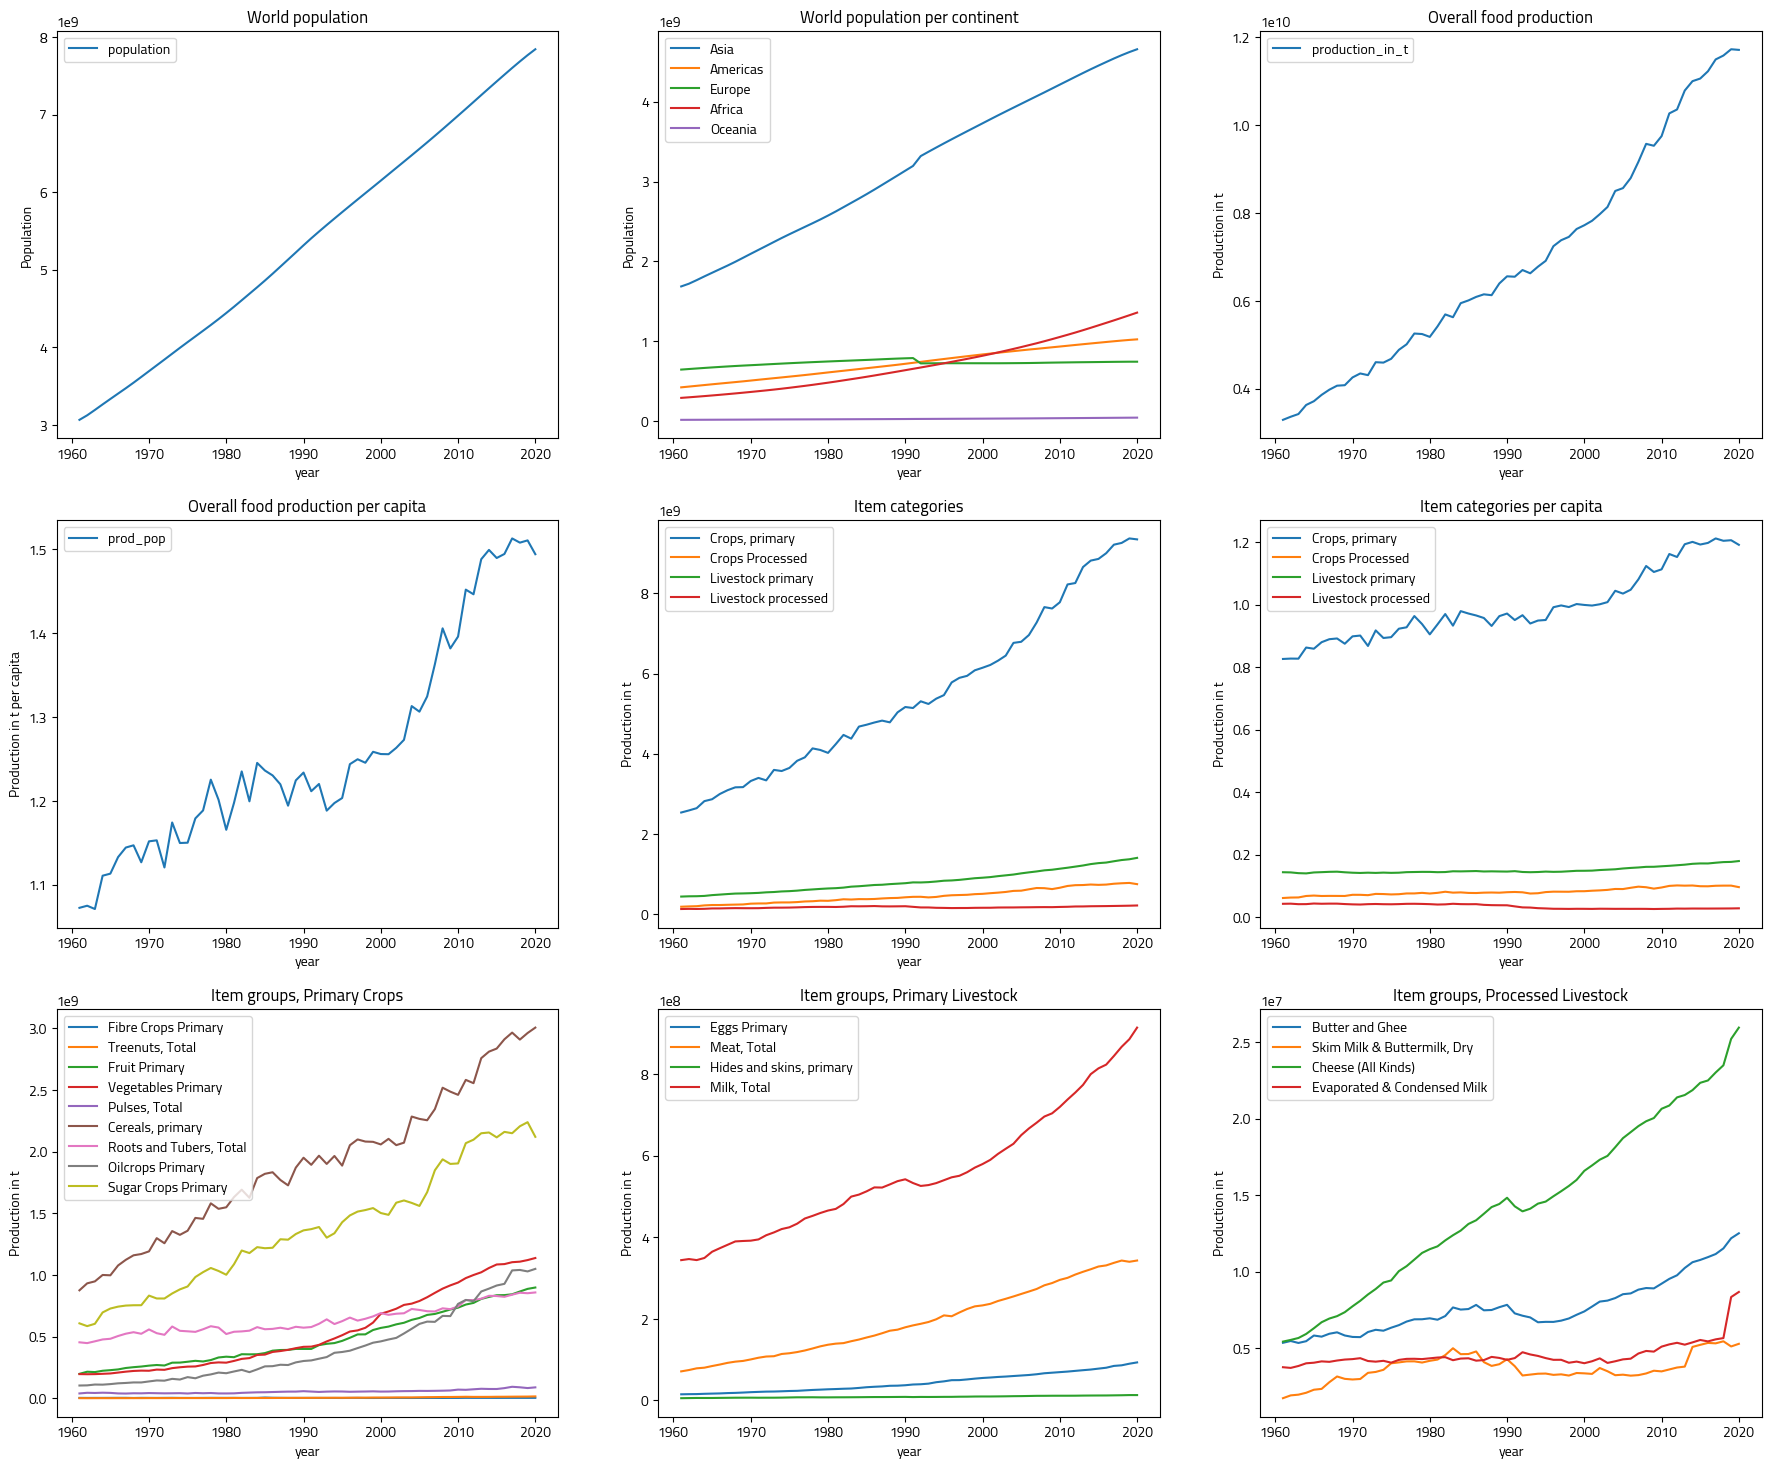

In [11]:
world_production_grouped_0 = world_production[['year', 'population']].groupby(['year'], as_index=False).max()
world_production_grouped_5 = continent_production[['year', 'country', 'continent', 'population']].groupby(['year', 'country', 'continent'], as_index=False).max()
world_production_grouped_5 = world_production_grouped_5[['year', 'continent', 'population']].groupby(['year', 'continent'], as_index=False).sum()
world_production_grouped_1 = world_production[['year', 'production_in_t']].groupby(['year'], as_index=False).sum()
world_production_grouped_2 = world_production[['year', 'prod_pop']].groupby(['year'], as_index=False).sum()
world_production_grouped_6 = world_production[['year', 'item_category', 'prod_pop']].groupby(['year', 'item_category'], as_index=False).sum()
world_production_grouped_3 = world_production[['year', 'item_category', 'production_in_t']].groupby(['year', 'item_category'], as_index=False).sum()
world_production_grouped_4 = world_production[['year', 'item_group', 'production_in_t']].groupby(['year', 'item_group'], as_index=False).sum()

fig, axes = plt.subplots(3, 3, figsize=(22, 18))
plt.rcParams['font.family'] = 'Cairo'

world_production_grouped_0.plot(x='year', y='population', ax=axes[0][0])
axes[0][0].legend()
axes[0][0].set_ylabel('Population')
axes[0][0].set_title('World population')

for continent in continents:
    world_production_grouped_5[world_production_grouped_5.continent == continent].plot(x='year', y='population', ax=axes[0][1], label=continent)
    axes[0][1].legend()
    axes[0][1].set_ylabel('Population')
    axes[0][1].set_title('World population per continent')

world_production_grouped_1.plot(x='year', y='production_in_t', ax=axes[0][2])
axes[0][2].legend()
axes[0][2].set_ylabel('Production in t')
axes[0][2].set_title('Overall food production')

world_production_grouped_2.plot(x='year', y='prod_pop', ax=axes[1][0])
axes[1][0].legend()
axes[1][0].set_ylabel('Production in t per capita')
axes[1][0].set_title('Overall food production per capita')

# Iterate over item categories
for item_category in item_categories:
    world_production_grouped_3[world_production_grouped_3.item_category == item_category].plot(x='year', y='production_in_t', ax=axes[1][1], label=item_category)
    axes[1][1].legend()
    axes[1][1].set_ylabel('Production in t')
    axes[1][1].set_title('Item categories')

# Iterate over item categories
for item_category in item_categories:
    world_production_grouped_6[world_production_grouped_6.item_category == item_category].plot(x='year', y='prod_pop', ax=axes[1][2], label=item_category)
    axes[1][2].legend()
    axes[1][2].set_ylabel('Production in t')
    axes[1][2].set_title('Item categories per capita')

# Iterate over item groups for primary crops
for item_group in item_groups_crops_primary:
    world_production_grouped_4[world_production_grouped_4.item_group == item_group].plot(x='year', y='production_in_t', ax=axes[2][0], label=item_group)
    axes[2][0].legend()
    axes[2][0].set_ylabel('Production in t')
    axes[2][0].set_title('Item groups, Primary Crops')

# Iterate over item groups for primary livestock
for item_group in item_groups_livestock_primary:
    world_production_grouped_4[world_production_grouped_4.item_group == item_group].plot(x='year', y='production_in_t', ax=axes[2][1], label=item_group)
    axes[2][1].legend()
    axes[2][1].set_ylabel('Production in t')
    axes[2][1].set_title('Item groups, Primary Livestock')

# Iterate over item groups for processed livestock
for item_group in item_groups_livestock_processed:
    world_production_grouped_4[world_production_grouped_4.item_group == item_group].plot(x='year', y='production_in_t', ax=axes[2][2], label=item_group)
    axes[2][2].legend()
    axes[2][2].set_ylabel('Production in t')
    axes[2][2].set_title('Item groups, Processed Livestock')

In [12]:
world_production_2020 = world_production[df_prod_emis.year == 2020]

/var/folders/t3/dy_ryj0x3q76fqtght3g0dfh0000gn/T/ipykernel_16647/2018193223.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  world_production_2020 = world_production[df_prod_emis.year == 2020]


Text(0, 0.5, 'Production in t')

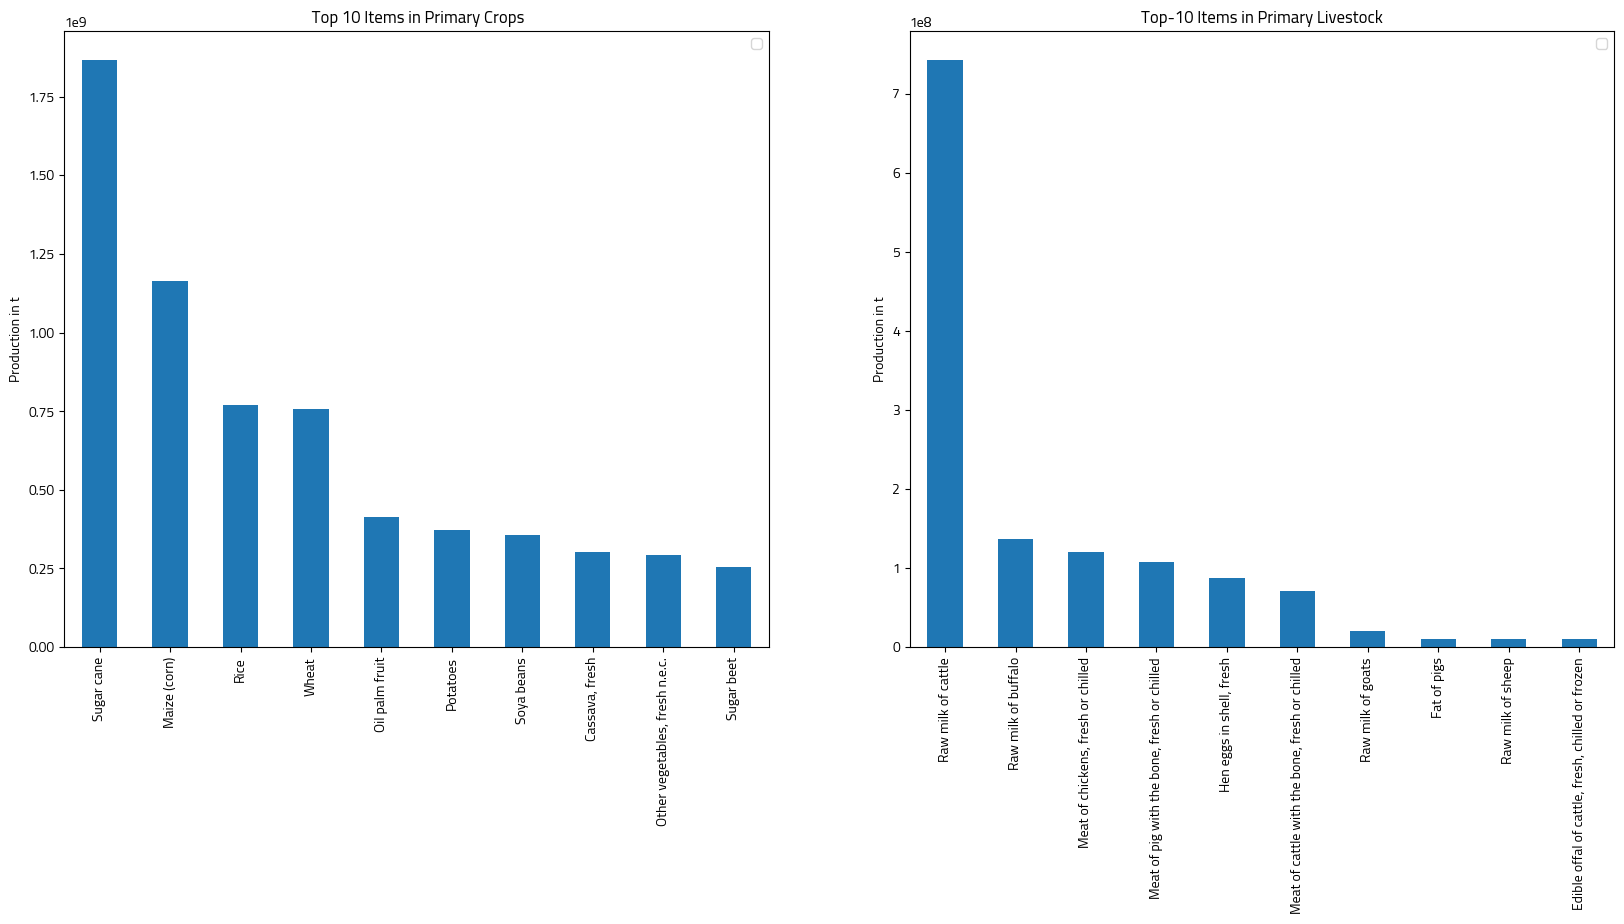

In [13]:
world_production_2020_grouped_1 = world_production_2020[world_production_2020.item_category == 'Crops, primary']
world_production_2020_grouped_1 = world_production_2020_grouped_1[['item', 'production_in_t']].groupby(['item'], as_index=False).agg('sum').sort_values(by='production_in_t', ascending=False)
world_production_2020_grouped_2 = world_production_2020[world_production_2020.item_category == 'Livestock primary']
world_production_2020_grouped_2 = world_production_2020_grouped_2[['item', 'production_in_t']].groupby(['item'], as_index=False).agg('sum').sort_values(by='production_in_t', ascending=False)

# Plot the top-10 agricultural emissions producers
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

world_production_2020_grouped_1.head(10).plot.bar(x='item', y='production_in_t', ax=axes[0])
axes[0].set_title(' Top 10 Items in Primary Crops')
axes[0].set_xlabel('')
axes[0].legend('')
axes[0].set_ylabel('Production in t')

world_production_2020_grouped_2.head(10).plot.bar(x='item', y='production_in_t', ax=axes[1])
axes[1].set_title('Top-10 Items in Primary Livestock')
axes[1].set_xlabel('')
axes[1].legend('')
axes[1].set_ylabel('Production in t')

## World emissions by food production

In [14]:
world_emissions = df_prod_emis[(df_prod_emis.country == 'World') & (df_prod_emis.year != 2021) & (df_prod_emis.emissions_co2eq_combined_in_kt.notnull())]

### Total emissions in kt

In [15]:
item_categories = world_emissions.item_category.unique().tolist()
item_groups = world_emissions.item_group.unique().tolist()
items = world_emissions.item.unique().tolist()
meat = list(filter(lambda x: 'Meat' in x, items))
milk_eggs = list(filter(lambda x: 'Raw milk' in x or 'Hen eggs' in x, items))
rice_wheat_maize = list(filter(lambda x: 'Rice' in x or 'Wheat' in x or 'Maize' in x, items))
remaining = list(set(items) - set(meat + milk_eggs + rice_wheat_maize))

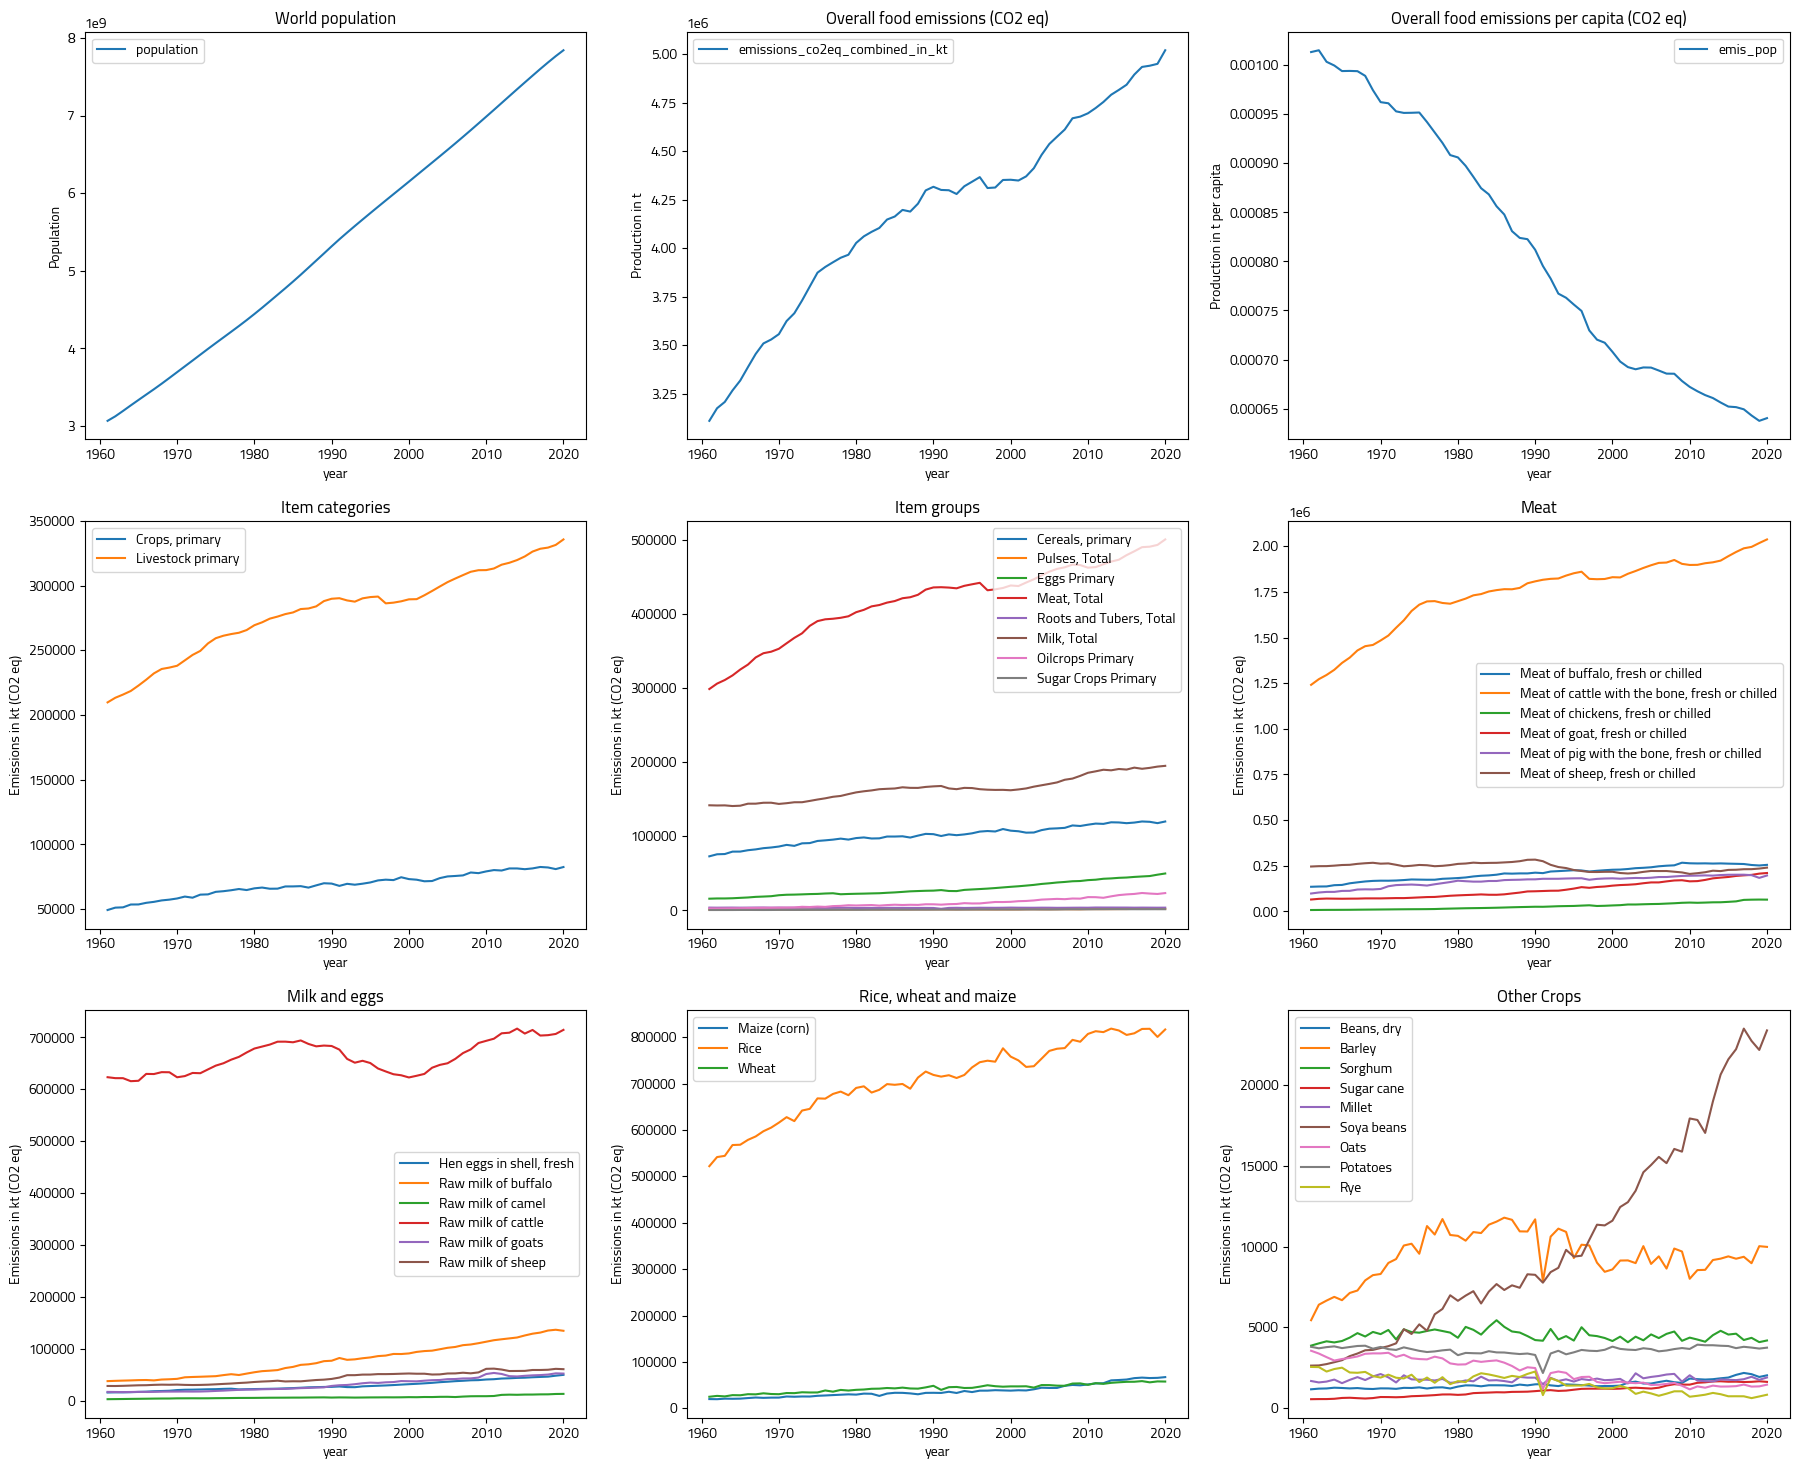

In [16]:
world_emissions_grouped_0 = world_emissions[['year', 'population']].groupby(['year'], as_index=False).max()
world_emissions_grouped_5 = world_emissions[['year', 'emissions_co2eq_combined_in_kt']].groupby(['year'], as_index=False).sum()
world_emissions_grouped_6 = world_emissions[['year', 'emis_pop']].groupby(['year'], as_index=False).sum()
world_emissions_grouped_1 = world_emissions[['item_category', 'year', 'emissions_co2eq_combined_in_kt']].groupby(['item_category', 'year'], as_index=False).agg('mean')
world_emissions_grouped_2 = world_emissions[['item_group', 'year', 'emissions_co2eq_combined_in_kt']].groupby(['item_group', 'year'], as_index=False).agg('mean')
world_emissions_grouped_3 = world_emissions[['item', 'year', 'emissions_co2eq_combined_in_kt']].groupby(['item', 'year'], as_index=False).agg('mean')

fig, axes = plt.subplots(3, 3, figsize=(22, 18))

world_emissions_grouped_0.plot(x='year', y='population', ax=axes[0][0])
axes[0][0].legend()
axes[0][0].set_ylabel('Population')
axes[0][0].set_title('World population')

world_emissions_grouped_5.plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[0][1])
axes[0][1].legend()
axes[0][1].set_ylabel('Production in t')
axes[0][1].set_title('Overall food emissions (CO2 eq)')

world_emissions_grouped_6.plot(x='year', y='emis_pop', ax=axes[0][2])
axes[0][2].legend()
axes[0][2].set_ylabel('Production in t per capita')
axes[0][2].set_title('Overall food emissions per capita (CO2 eq)')

# Iterate over item categories
for item_category in item_categories:
    world_emissions_grouped_1[world_emissions_grouped_1.item_category == item_category].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[1][0], label=item_category)
    axes[1][0].legend()
    axes[1][0].set_ylabel('Emissions in kt (CO2 eq)')
    axes[1][0].set_title('Item categories')

# Iterate over item groups
for item_group in item_groups:
    world_emissions_grouped_2[world_emissions_grouped_2.item_group == item_group].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[1][1], label=item_group)
    axes[1][1].legend()
    axes[1][1].set_ylabel('Emissions in kt (CO2 eq)')
    axes[1][1].set_title('Item groups')

# Iterate over meat items
for item in meat:
    world_emissions_grouped_3[world_emissions_grouped_3.item == item].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[1][2], label=item)
    axes[1][2].legend()
    axes[1][2].set_ylabel('Emissions in kt (CO2 eq)')
    axes[1][2].set_title('Meat')

# Iterate over milk and eggs items
for item in milk_eggs:
    world_emissions_grouped_3[world_emissions_grouped_3.item == item].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[2][0], label=item)
    axes[2][0].legend()
    axes[2][0].set_ylabel('Emissions in kt (CO2 eq)')
    axes[2][0].set_title('Milk and eggs')

# Iterate over rice, wheat and maize items
for item in rice_wheat_maize:
    world_emissions_grouped_3[world_emissions_grouped_3.item == item].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[2][1], label=item)
    axes[2][1].legend()
    axes[2][1].set_ylabel('Emissions in kt (CO2 eq)')
    axes[2][1].set_title('Rice, wheat and maize')

    
# Iterate over remaining items
for item in remaining:
    world_emissions_grouped_3[world_emissions_grouped_3.item == item].plot(x='year', y='emissions_co2eq_combined_in_kt', ax=axes[2][2], label=item)
    axes[2][2].legend()
    axes[2][2].set_ylabel('Emissions in kt (CO2 eq)')
    axes[2][2].set_title('Other Crops')

Text(0.5, 1.0, 'Emissions')

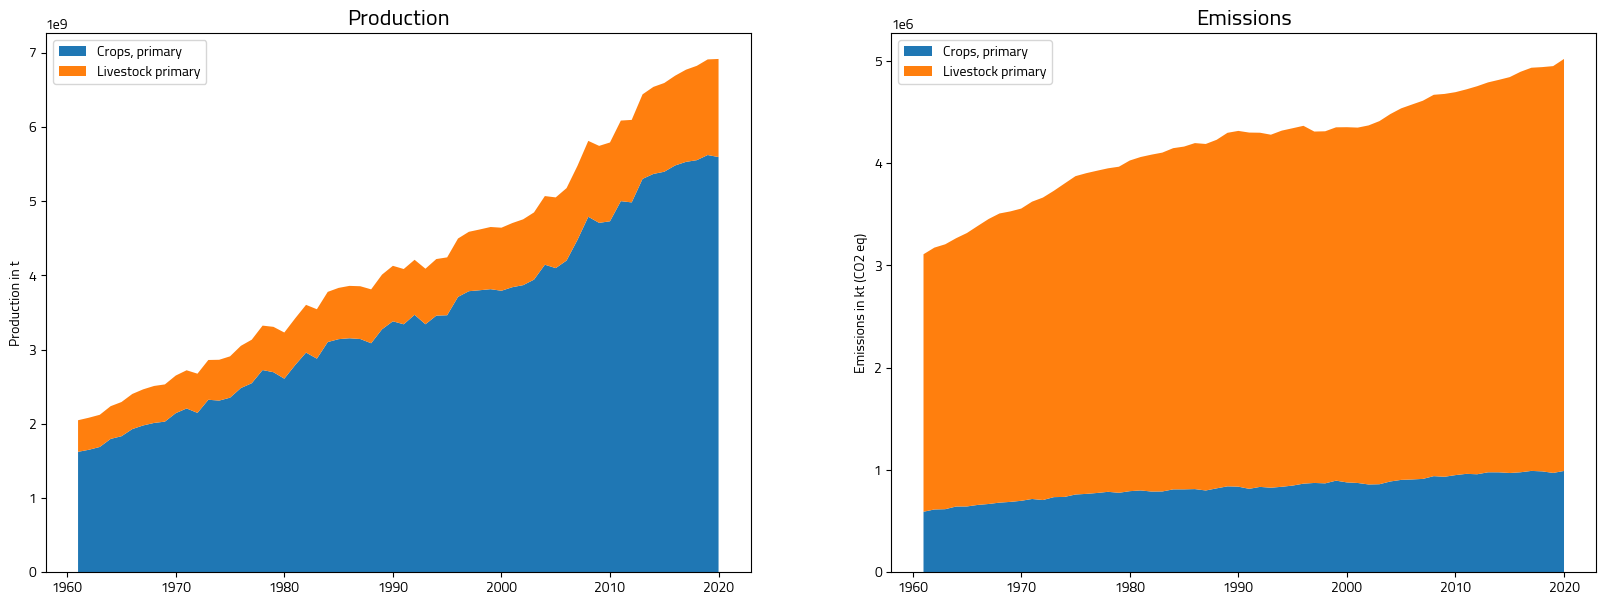

In [19]:
world_emissions_grouped_4 = world_emissions[['item_category', 'year', 'production_in_t', 'emissions_co2eq_combined_in_kt']].groupby(['item_category', 'year'], as_index=False).agg('sum')

x = world_emissions_grouped_4.groupby(['year']).max()
x['year'] = x.index
x = x.year

y1 = world_emissions_grouped_4[world_emissions_grouped_4['item_category'] == 'Crops, primary'].production_in_t
y2 = world_emissions_grouped_4[world_emissions_grouped_4['item_category'] == 'Livestock primary'].production_in_t

z1 = world_emissions_grouped_4[world_emissions_grouped_4['item_category'] == 'Crops, primary'].emissions_co2eq_combined_in_kt
z2 = world_emissions_grouped_4[world_emissions_grouped_4['item_category'] == 'Livestock primary'].emissions_co2eq_combined_in_kt

fig, axes = plt.subplots(1, 2, figsize=(20, 7))
plt.set_cmap('Oranges')

# Iterate over meat items
axes[0].stackplot(x, y1, y2, labels=world_emissions_grouped_4.item_category.unique().tolist())
axes[0].legend(loc='upper left')
axes[0].set_ylabel('Production in t')
axes[0].set_title('Production', fontsize=16)

axes[1].stackplot(x, z1, z2, labels=world_emissions_grouped_4.item_category.unique().tolist())
axes[1].legend(loc='upper left')
axes[1].set_ylabel('Emissions in kt (CO2 eq)')
axes[1].set_title('Emissions', fontsize=16)

In [88]:
def meat_type(food_item):
    if food_item == 'Meat of cattle with the bone, fresh or chilled':
        return 'cattle'
    elif food_item == 'Meat of pig with the bone, fresh or chilled':
        return 'pigs'
    elif food_item == 'Meat of chickens, fresh or chilled':
        return 'chickens'
    elif food_item == 'Meat of buffalo, fresh or chilled':
        return 'buffalo'
    elif food_item == 'Meat of goat, fresh or chilled':
        return 'goat'
    elif food_item == 'Meat of sheep, fresh or chilled':
        return 'sheep'
    return 'meat of other animals'

world_emissions_meat= world_emissions[world_emissions.item_group == 'Meat, Total']
world_emissions_meat['meat_type'] = world_emissions_meat.item.apply(lambda x: meat_type(x))

/var/folders/t3/dy_ryj0x3q76fqtght3g0dfh0000gn/T/ipykernel_16647/3237323339.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_emissions_meat['meat_type'] = world_emissions_meat.item.apply(lambda x: meat_type(x))


In [89]:
meat = world_emissions_meat.meat_type.unique().tolist()
meat

['buffalo', 'cattle', 'chickens', 'goat', 'pigs', 'sheep']

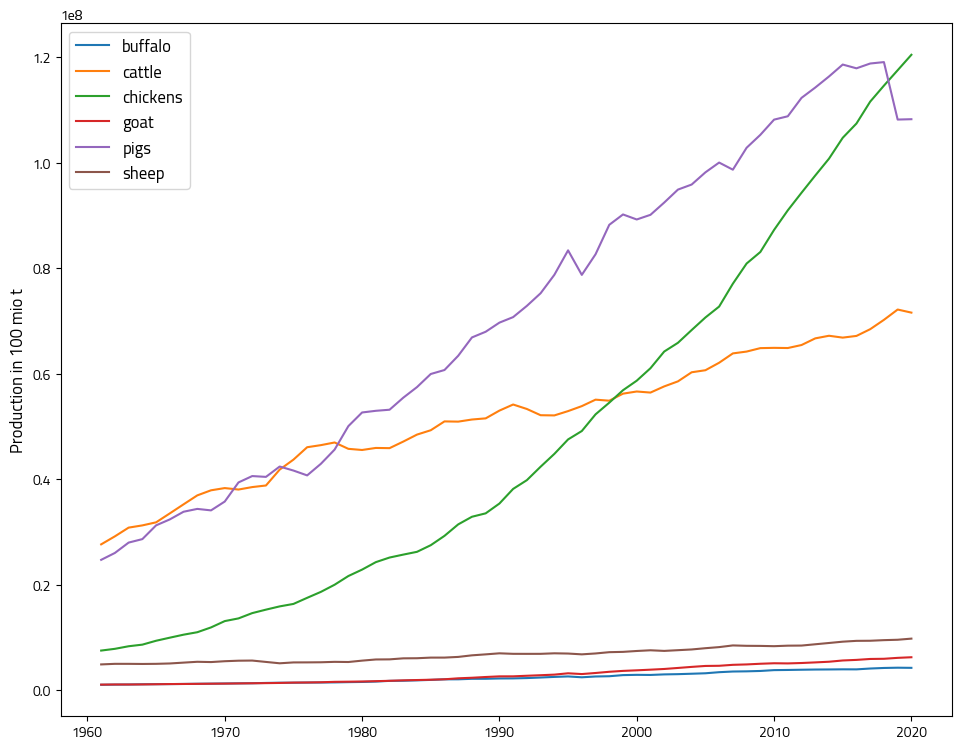

In [90]:
world_emissions_grouped_9 = world_emissions_meat[['meat_type', 'year', 'production_in_t', 'emissions_co2eq_combined_in_kt']].groupby(['meat_type', 'year'], as_index=False).agg('sum')

world_emissions_grouped_9_2020 = world_emissions_grouped_9[(world_emissions_grouped_9.year == 2020)]

fig, axes = plt.subplots(1, 1, figsize=(11.5, 9))

# Iterate over meat items
for meat_type in meat:
    world_emissions_grouped_9[world_emissions_grouped_9.meat_type == meat_type].plot(x='year', y='production_in_t', ax=axes, label=meat_type)
    axes.legend(fontsize=12)
    axes.set_ylabel('Production in 100 mio t', fontsize=12)
    axes.set_xlabel('')
    #axes.set_title('Development of Meat Production', fontsize=20)

#world_emissions_grouped_9_2020[['meat_type', 'emissions_co2eq_combined_in_kt']].groupby('meat_type').agg('sum').plot.pie(y='emissions_co2eq_combined_in_kt', ax=axes[1], fontsize=13, autopct='%1.1f%%')
#axes[1].set_ylabel('')
#axes[1].legend('')
#axes[1].set_title('Meat Emissions in 2020', fontsize=20)

In [41]:
def crop_type(food_item):
    if food_item == 'Rice':
        return 'rice'
    elif food_item == 'Wheat':
        return 'wheat'
    elif food_item == 'Maize (corn)':
        return 'maize'
    elif food_item == 'Sugar cane':
        return 'sugar cane'
    return 'other crops'

world_emissions_crops = world_emissions[world_emissions.item_category == 'Crops, primary']
world_emissions_crops['crop_type'] = world_emissions_crops.item.apply(lambda x: crop_type(x))

/var/folders/t3/dy_ryj0x3q76fqtght3g0dfh0000gn/T/ipykernel_16647/2676505879.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_emissions_crops['crop_type'] = world_emissions_crops.item.apply(lambda x: crop_type(x))


In [42]:
crops = world_emissions_crops.crop_type.unique().tolist()
crops

['other crops', 'maize', 'rice', 'sugar cane', 'wheat']

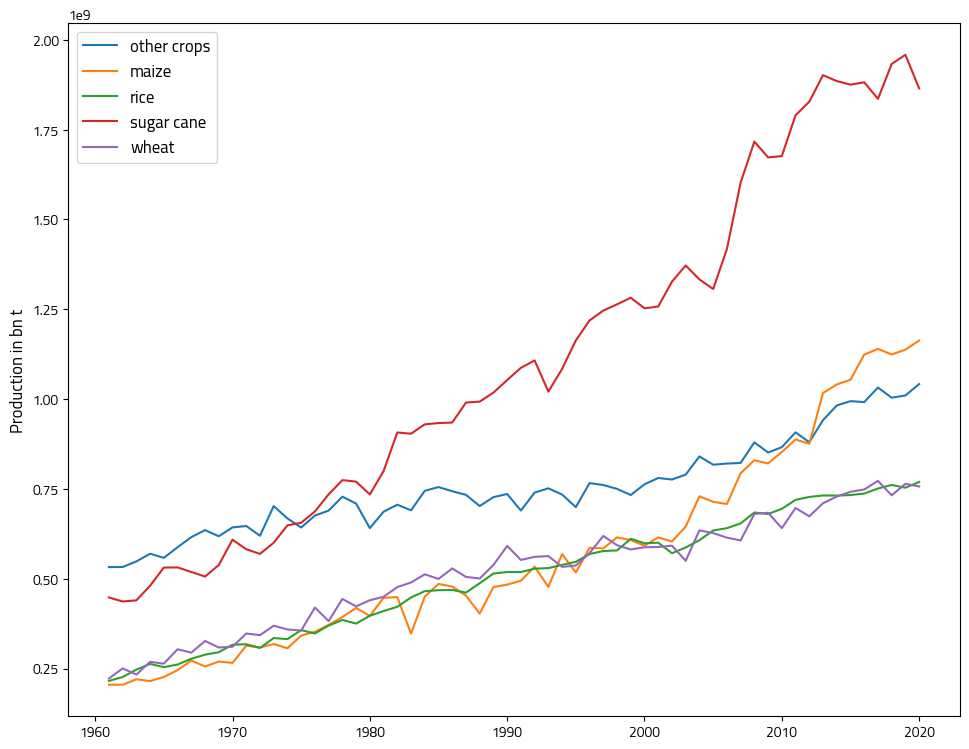

In [47]:
world_emissions_grouped_8 = world_emissions_crops[['crop_type', 'year', 'production_in_t', 'emissions_co2eq_combined_in_kt']].groupby(['crop_type', 'year'], as_index=False).agg('sum')

world_emissions_grouped_8_2020 = world_emissions_grouped_8[(world_emissions_grouped_8.year == 2020)]

fig, axes = plt.subplots(1, 1, figsize=(11.5, 9))

# Iterate over meat items
for crop_type in crops:
    world_emissions_grouped_8[world_emissions_grouped_8.crop_type == crop_type].plot(x='year', y='production_in_t', ax=axes, label=crop_type)
    axes.legend(fontsize=12)
    axes.set_ylabel('Production in bn t', fontsize=12)
    axes.set_xlabel('')
    #axes.set_title('Development of Crops Production', fontsize=20)

#world_emissions_grouped_8_2020[['crop_type', 'emissions_co2eq_combined_in_kt']].groupby('crop_type').agg('sum').plot.pie(y='emissions_co2eq_combined_in_kt', ax=axes[1], fontsize=13, autopct='%1.1f%%')
#axes[1].set_ylabel('')
#axes[1].legend('')
#axes[1].set_title('Crops Emissions in 2020', fontsize=20)

### Emission intensity

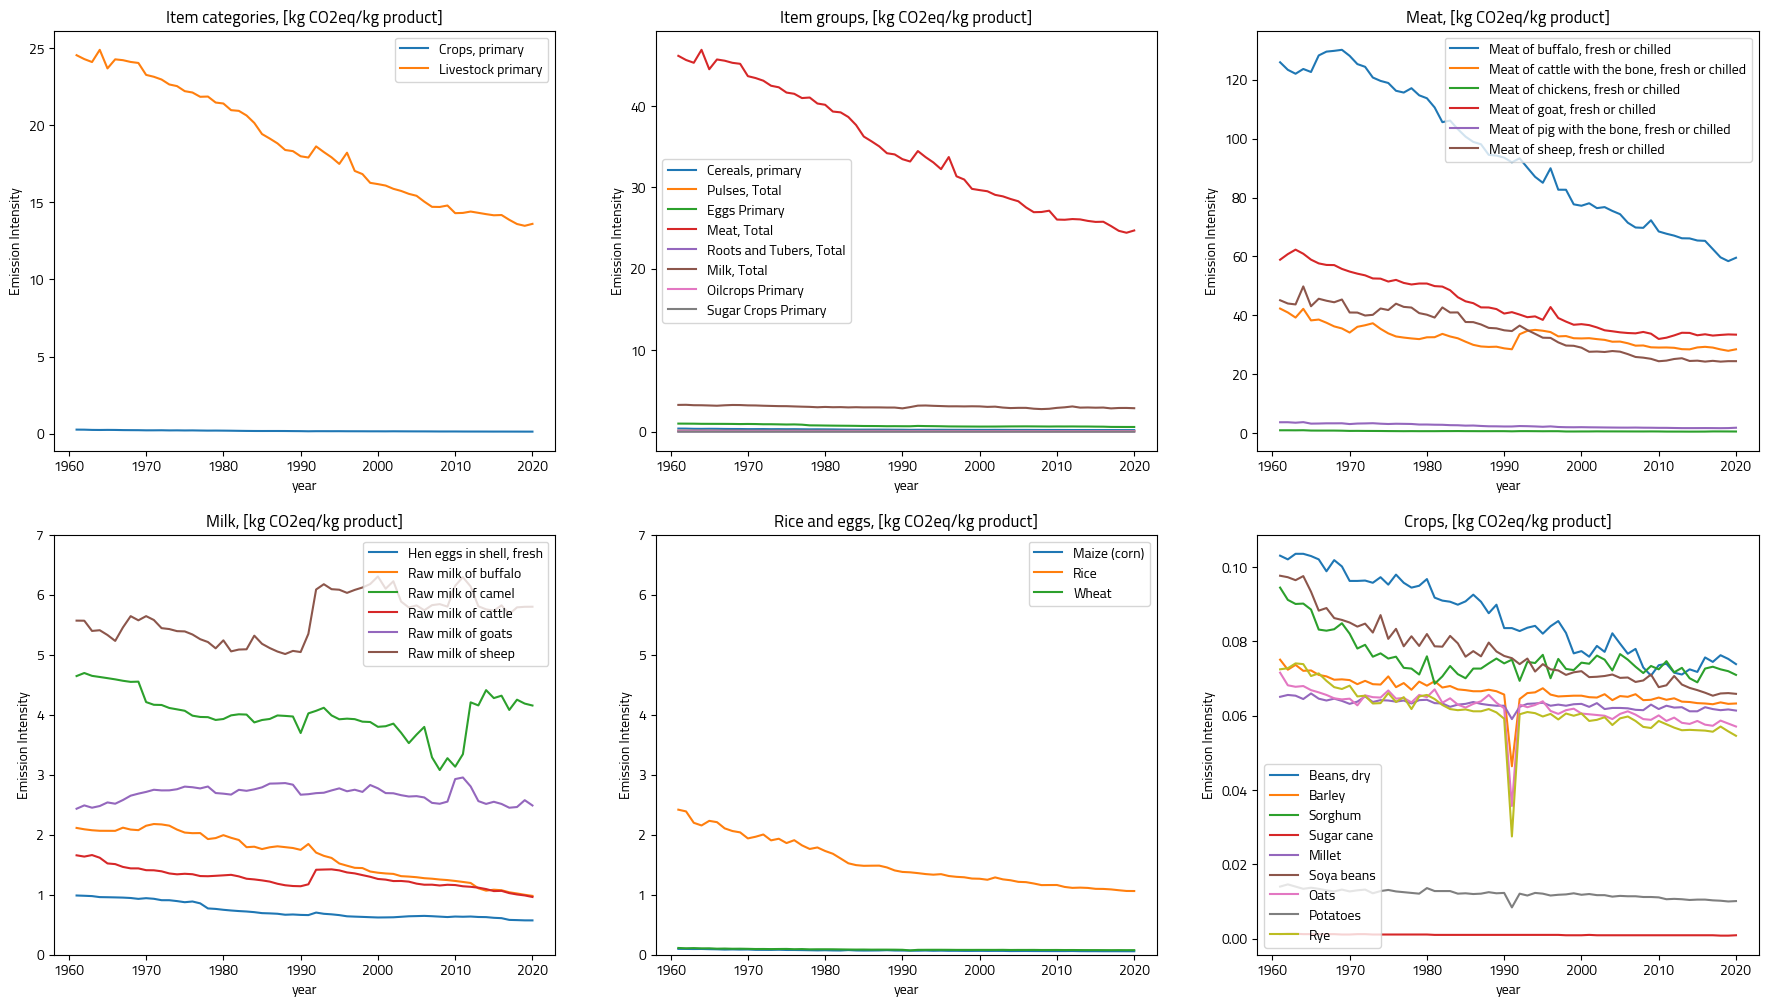

In [48]:
world_emissions_grouped_1 = world_emissions[['item_category', 'year', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item_category', 'year'], as_index=False).agg('mean')
world_emissions_grouped_2 = world_emissions[['item_group', 'year', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item_group', 'year'], as_index=False).agg('mean')
world_emissions_grouped_3 = world_emissions[['item', 'year', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item', 'year'], as_index=False).agg('mean')

fig, axes = plt.subplots(2, 3, figsize=(22, 12))

# Iterate over item categories
for item_category in item_categories:
    world_emissions_grouped_1[world_emissions_grouped_1.item_category == item_category].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[0][0], label=item_category)
    axes[0][0].legend()
    axes[0][0].set_ylabel('Emission Intensity')
    axes[0][0].set_title('Item categories, [kg CO2eq/kg product]')

# Iterate over item groups
for item_group in item_groups:
    world_emissions_grouped_2[world_emissions_grouped_2.item_group == item_group].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[0][1], label=item_group)
    axes[0][1].legend()
    axes[0][1].set_ylabel('Emission Intensity')
    axes[0][1].set_title('Item groups, [kg CO2eq/kg product]')

# Iterate over meat items
for item in meat:
    world_emissions_grouped_3[world_emissions_grouped_3.item == item].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[0][2], label=item)
    axes[0][2].legend()
    axes[0][2].set_ylabel('Emission Intensity')
    axes[0][2].set_title('Meat, [kg CO2eq/kg product]')

# Iterate over milk and egg items
for item in milk_eggs:
    world_emissions_grouped_3[world_emissions_grouped_3.item == item].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[1][0], label=item)
    axes[1][0].legend()
    axes[1][0].set_ylabel('Emission Intensity')
    axes[1][0].set_title('Milk, [kg CO2eq/kg product]')
    axes[1][0].set_ylim([0,7])

# Iterate over rice, wheat and maize items
for item in rice_wheat_maize:
    world_emissions_grouped_3[world_emissions_grouped_3.item == item].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[1][1], label=item)
    axes[1][1].legend()
    axes[1][1].set_ylabel('Emission Intensity')
    axes[1][1].set_title('Rice and eggs, [kg CO2eq/kg product]')
    axes[1][1].set_ylim([0,7])
    
# Iterate over remaining items
for item in remaining:
    world_emissions_grouped_3[world_emissions_grouped_3.item == item].plot(x='year', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[1][2], label=item)
    axes[1][2].legend()
    axes[1][2].set_ylabel('Emission Intensity')
    axes[1][2].set_title('Crops, [kg CO2eq/kg product]')

## Analysis for 2020

### Country comparison - production and emissions

In [49]:
prod_emis_countries = df_prod_emis[(df_prod_emis.year == 2020) & (df_prod_emis.emissions_co2eq_combined_in_kt.notnull()) & (df_prod_emis.country != 'World')]

Text(0, 0.5, 'Emissions in kt (co2eq)')

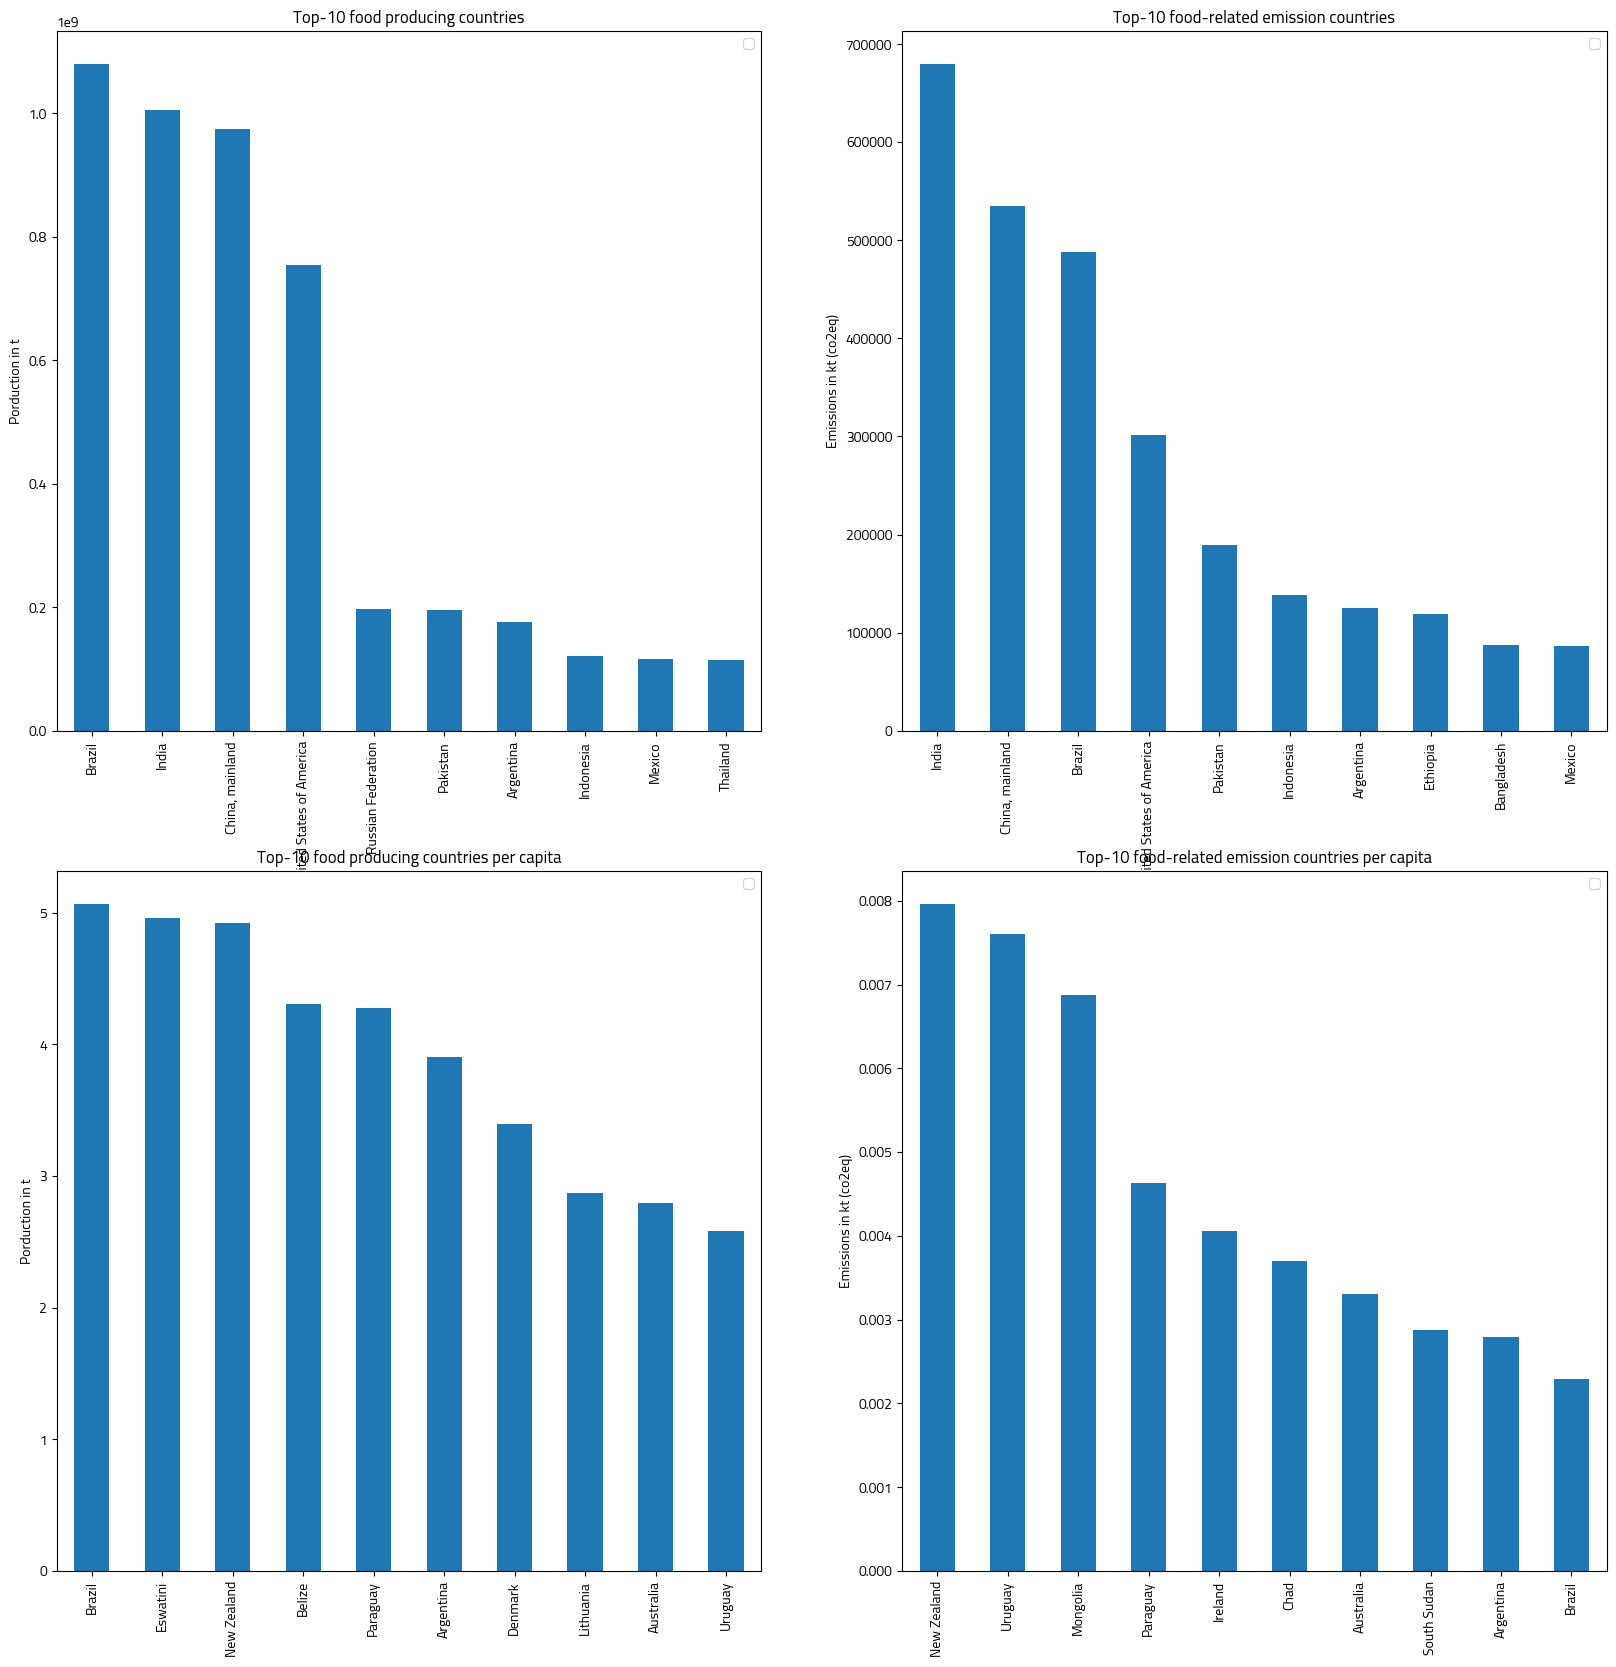

In [50]:
prod_emis_countries_grouped_1 = prod_emis_countries[['country', 'production_in_t']].groupby(['country'], as_index=False).agg('sum').sort_values(by='production_in_t', ascending=False)
prod_emis_countries_grouped_2 = prod_emis_countries[['country', 'prod_pop']].groupby(['country'], as_index=False).agg('sum').sort_values(by='prod_pop', ascending=False)
prod_emis_countries_grouped_3 = prod_emis_countries[['country', 'emissions_co2eq_combined_in_kt']].groupby(['country'], as_index=False).agg('sum').sort_values(by='emissions_co2eq_combined_in_kt', ascending=False)
prod_emis_countries_grouped_4 = prod_emis_countries[['country', 'emis_pop']].groupby(['country'], as_index=False).agg('sum').sort_values(by='emis_pop', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(20, 20))

prod_emis_countries_grouped_1.head(10).plot.bar(x='country', y='production_in_t', ax=axes[0][0])
axes[0][0].set_title('Top-10 food producing countries')
axes[0][0].set_xlabel('')
axes[0][0].legend('')
axes[0][0].set_ylabel('Porduction in t')

prod_emis_countries_grouped_3.head(10).plot.bar(x='country', y='emissions_co2eq_combined_in_kt', ax=axes[0][1])
axes[0][1].set_title('Top-10 food-related emission countries')
axes[0][1].set_xlabel('')
axes[0][1].legend('')
axes[0][1].set_ylabel('Emissions in kt (co2eq)')

prod_emis_countries_grouped_2.head(10).plot.bar(x='country', y='prod_pop', ax=axes[1][0])
axes[1][0].set_title('Top-10 food producing countries per capita')
axes[1][0].set_xlabel('')
axes[1][0].legend('')
axes[1][0].set_ylabel('Porduction in t')

prod_emis_countries_grouped_4.head(10).plot.bar(x='country', y='emis_pop', ax=axes[1][1])
axes[1][1].set_title('Top-10 food-related emission countries per capita')
axes[1][1].set_xlabel('')
axes[1][1].legend('')
axes[1][1].set_ylabel('Emissions in kt (co2eq)')

### Item comparison - production and emissions

In [51]:
prod_emis_items = df_prod_emis[(df_prod_emis.emissions_co2eq_combined_in_kt.notnull()) & (df_prod_emis.country == 'World')]

In [52]:
items = prod_emis_countries.item.unique().tolist()
meat = list(filter(lambda x: 'Meat' in x, items))
milk_eggs= list(filter(lambda x: 'Raw milk' in x or 'Hen eggs' in x, items))
rice = list(filter(lambda x: 'Rice' in x, items))
crops = list(set(items) - set(meat + milk_eggs + rice))

In [53]:
def food_type(food_item):
    if food_item in meat:
        return 'meat'
    elif food_item in milk_eggs:
        return 'milk & eggs'
    elif food_item in rice:
        return 'rice'
    return 'crops'

In [54]:
prod_emis_items['food_type'] = prod_emis_items.item.apply(lambda x: food_type(x))

/var/folders/t3/dy_ryj0x3q76fqtght3g0dfh0000gn/T/ipykernel_16647/4085573758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_emis_items['food_type'] = prod_emis_items.item.apply(lambda x: food_type(x))


Text(0.5, 1.0, 'Food Emissions in 2020')

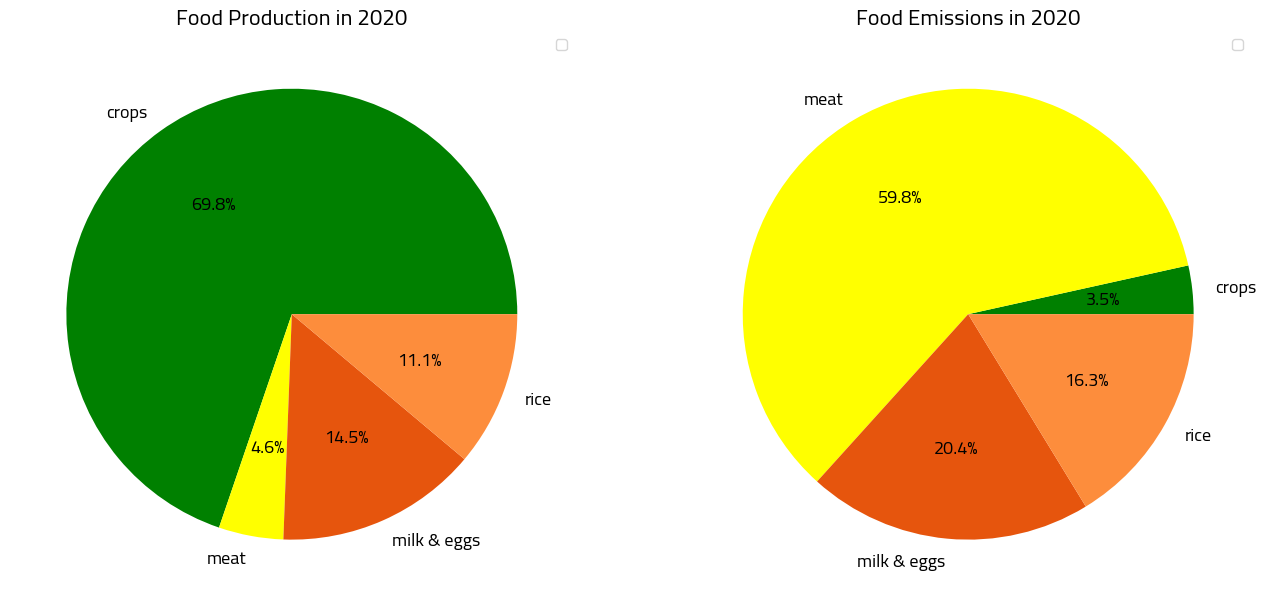

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
plt.rcParams['font.family'] = 'Cairo'

prod_emis_items_1 = prod_emis_items[prod_emis_items.year == 2020]

prod_emis_items_1[['food_type', 'production_in_t']].groupby('food_type').agg('sum').plot.pie(y='production_in_t', ax=axes[0], fontsize=13, autopct='%1.1f%%', colors = ['green', 'yellow', '#e6550d', '#fd8d3c'])
axes[0].set_ylabel('')
axes[0].legend('')
axes[0].set_title('Food Production in 2020', fontsize=16)

prod_emis_items_1[['food_type', 'emissions_co2eq_combined_in_kt']].groupby('food_type').agg('sum').plot.pie(y='emissions_co2eq_combined_in_kt', ax=axes[1], fontsize=13, autopct='%1.1f%%', colors = ['green', 'yellow', '#e6550d', '#fd8d3c'])
axes[1].set_ylabel('')
axes[1].legend('')
axes[1].set_title('Food Emissions in 2020', fontsize=16)

In [ ]:
pip install mycolorpy

In [ ]:
from mycolorpy import colorlist as mcp
color1=mcp.gen_color(cmap="Oranges",n=5)
print(color1)

Text(0.5, 1.0, 'Production by item group in 2020')

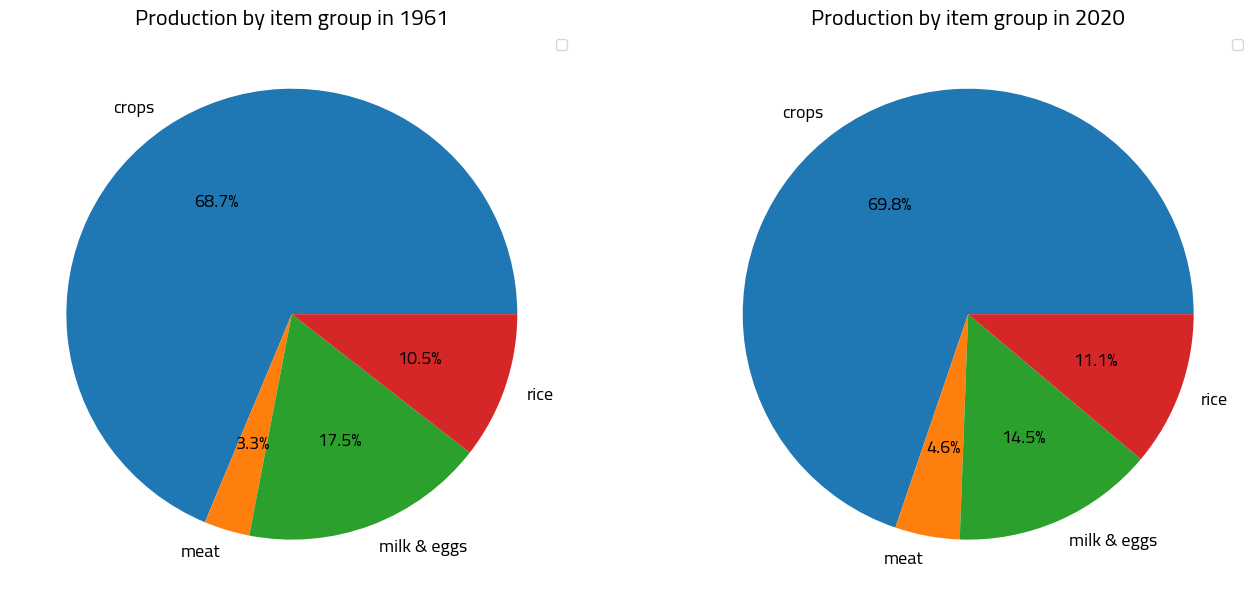

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

prod_emis_items_1961 = prod_emis_items[(prod_emis_items.year == 1961)]
prod_emis_items020 = prod_emis_items[(prod_emis_items.year == 2020)]

prod_emis_items_1961[['food_type', 'production_in_t']].groupby('food_type').agg('sum').plot.pie(y='production_in_t', ax=axes[0], fontsize=13, autopct='%1.1f%%')
axes[0].set_ylabel('')
axes[0].legend('')
axes[0].set_title('Production by item group in 1961', fontsize=16)

prod_emis_items020[['food_type', 'production_in_t']].groupby('food_type').agg('sum').plot.pie(y='production_in_t', ax=axes[1], fontsize=13, autopct='%1.1f%%')
axes[1].set_ylabel('')
axes[1].legend('')
axes[1].set_title('Production by item group in 2020', fontsize=16)

### Item comparison - emission itensities

In [58]:
prod_emis_intensities = df_prod_emis[(df_prod_emis.year == 2020) & (df_prod_emis.emissions_co2eq_combined_in_kt.notnull())]

In [59]:
prod_emis_intensities_names = prod_emis_intensities
prod_emis_intensities_names['item'] = prod_emis_intensities_names['item'].str.replace(', fresh or chilled', '')
prod_emis_intensities_names['item'] = prod_emis_intensities_names['item'].str.replace(' with the bone', '')

/var/folders/t3/dy_ryj0x3q76fqtght3g0dfh0000gn/T/ipykernel_16647/3931181892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_emis_intensities_names['item'] = prod_emis_intensities_names['item'].str.replace(', fresh or chilled', '')
/var/folders/t3/dy_ryj0x3q76fqtght3g0dfh0000gn/T/ipykernel_16647/3931181892.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_emis_intensities_names['item'] = prod_emis_intensities_names['item'].str.replace(' with the bone', '')


### Emission itensities overall

Text(0.5, 0, 'Emission intensity in kg CO2eq / kg')

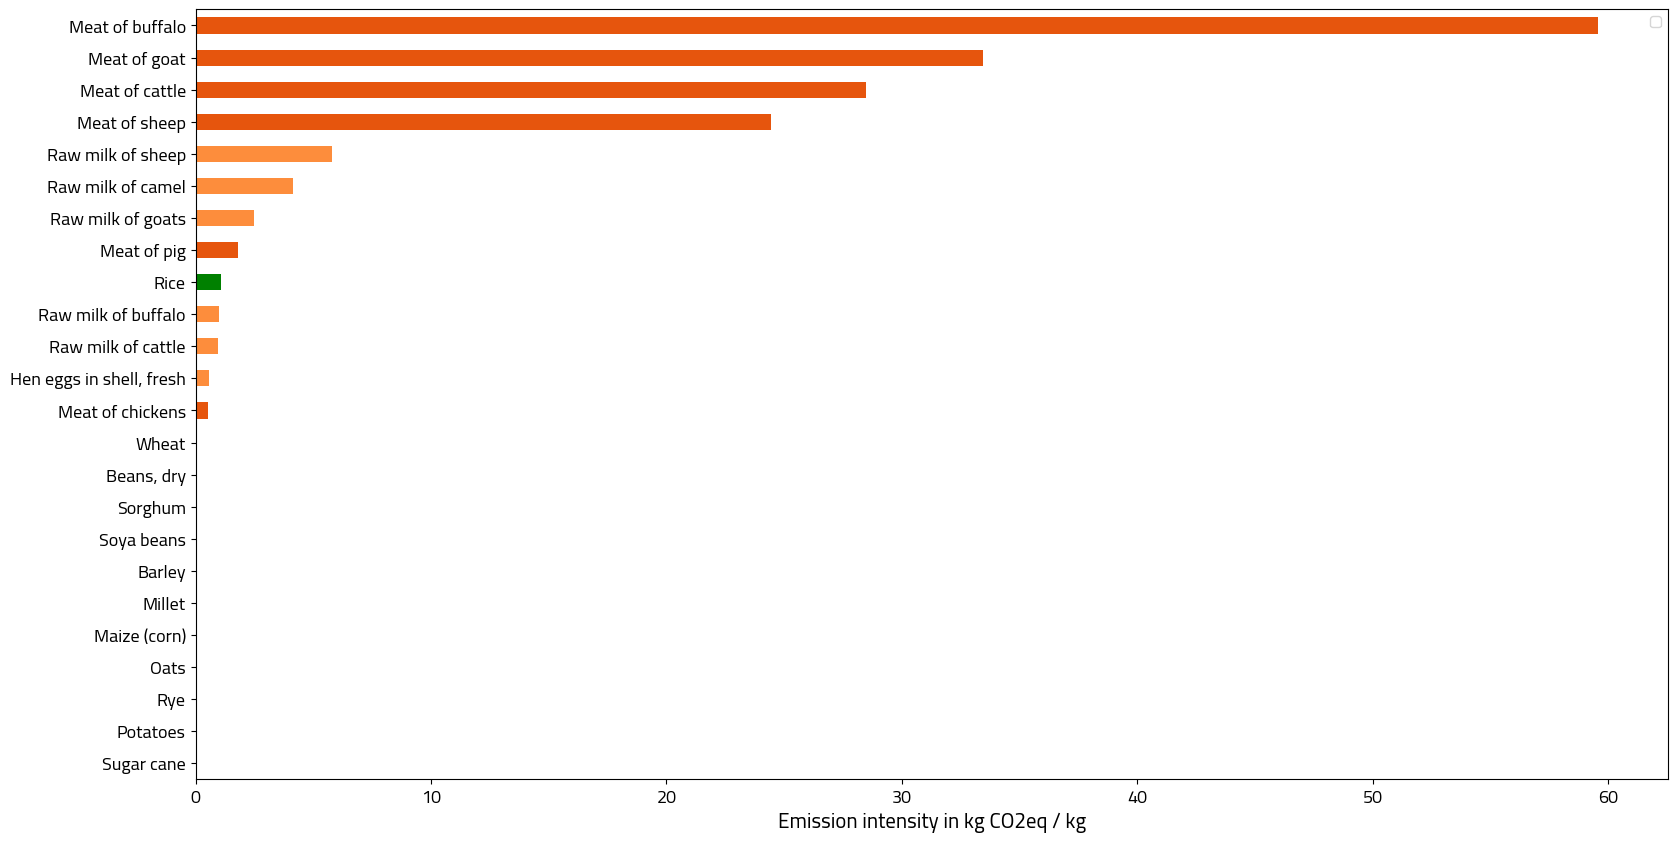

In [120]:
prod_emis_intensities_names_grouped_1 = prod_emis_intensities_names[(prod_emis_intensities_names['special_area'] == 'World') & (prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'] != 0)]
prod_emis_intensities_names_grouped_1 = prod_emis_intensities_names_grouped_1[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=True)
prod_emis_intensities_names_grouped_2 = prod_emis_intensities_names[prod_emis_intensities_names['country'] == 'Germany']
prod_emis_intensities_names_grouped_2= prod_emis_intensities_names_grouped_2[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=True)
prod_emis_intensities_names_grouped_3 = prod_emis_intensities_names[prod_emis_intensities_names['special_area'] == 'European Union (27)']
prod_emis_intensities_names_grouped_3= prod_emis_intensities_names_grouped_3[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=True)

fig, axes = plt.subplots(1, 1, figsize=(19, 10))

colors = ['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', '#e6550d', '#fd8d3c', '#fd8d3c', '#fd8d3c', 'green', '#e6550d', '#fd8d3c', '#fd8d3c', '#fd8d3c', '#e6550d', '#e6550d', '#e6550d', '#e6550d']

prod_emis_intensities_names_grouped_1.plot.barh(x='item', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes, color=colors)
#axes.set_title('World emissions intensity')
axes.set_ylabel('')
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
axes.legend('')
axes.set_xlabel('Emission intensity in kg CO2eq / kg', fontsize = 15)

Text(0.5, 0, 'Emission intensity in kg CO2eq / kg')

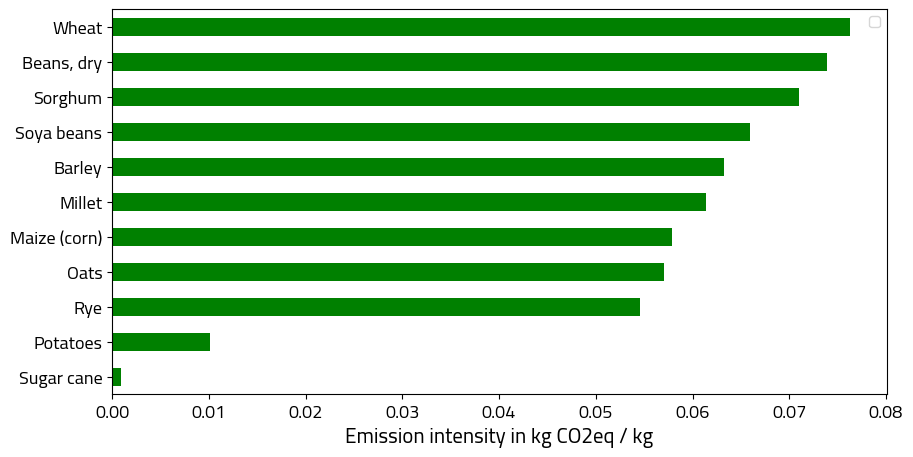

In [114]:
prod_emis_intensities_names_grouped_1 = prod_emis_intensities_names[(prod_emis_intensities_names.special_area == 'World') & (prod_emis_intensities_names.item_category == 'Crops, primary') & (prod_emis_intensities_names.item != 'Rice')]
prod_emis_intensities_names_grouped_1 = prod_emis_intensities_names_grouped_1[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=True)

fig, axes = plt.subplots(1, 1, figsize=(10, 5))

prod_emis_intensities_names_grouped_1.plot.barh(x='item', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes, color = 'green')
#axes.set_title('World emissions intensity')
axes.set_ylabel('')
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
axes.legend('')
axes.set_xlabel('Emission intensity in kg CO2eq / kg', fontsize = 15)

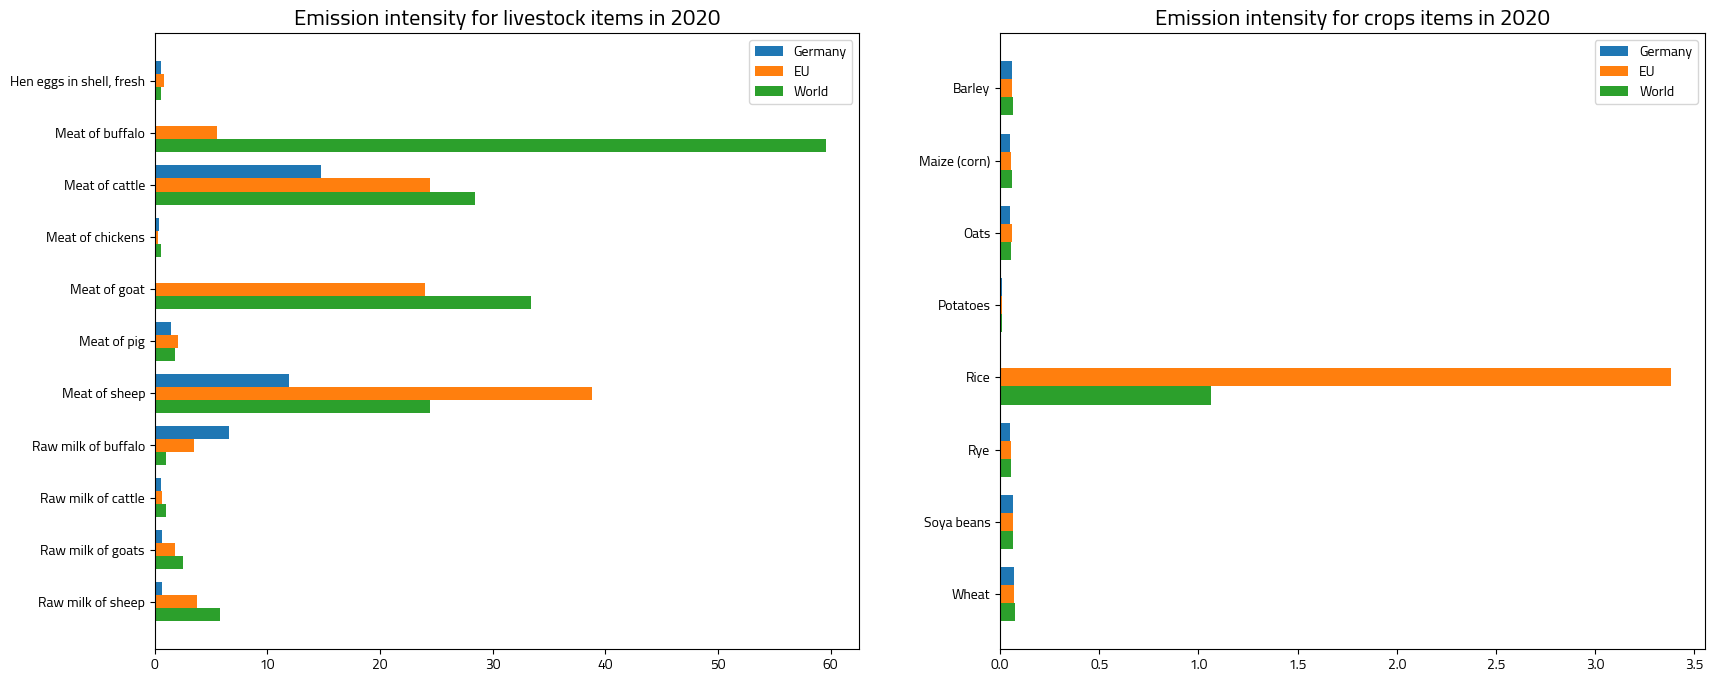

In [91]:
prod_emis_intensities_names_grouped_4 = prod_emis_intensities_names[(prod_emis_intensities_names.country == 'Germany') & (prod_emis_intensities_names.item_category == 'Livestock primary')]
prod_emis_intensities_names_grouped_4 = prod_emis_intensities_names_grouped_4[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='item', ascending=False)

prod_emis_intensities_names_grouped_5 = prod_emis_intensities_names[(prod_emis_intensities_names.special_area == 'European Union (27)') & (prod_emis_intensities_names.item_category == 'Livestock primary')]
prod_emis_intensities_names_grouped_5 = prod_emis_intensities_names_grouped_5[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='item', ascending=False)

prod_emis_intensities_names_grouped_6 = prod_emis_intensities_names[(prod_emis_intensities_names.country == 'World') & (prod_emis_intensities_names.item_category == 'Livestock primary')]
prod_emis_intensities_names_grouped_6 = prod_emis_intensities_names_grouped_6[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='item', ascending=False)

prod_emis_intensities_names_grouped_7 = prod_emis_intensities_names[(prod_emis_intensities_names.country == 'Germany') & (prod_emis_intensities_names.item_category == 'Crops, primary')]
prod_emis_intensities_names_grouped_7 = prod_emis_intensities_names_grouped_7[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='item', ascending=False)

prod_emis_intensities_names_grouped_8 = prod_emis_intensities_names[(prod_emis_intensities_names.special_area == 'European Union (27)') & (prod_emis_intensities_names.item_category == 'Crops, primary')]
prod_emis_intensities_names_grouped_8 = prod_emis_intensities_names_grouped_8[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='item', ascending=False)

prod_emis_intensities_names_grouped_9 = prod_emis_intensities_names[(prod_emis_intensities_names.country == 'World') & (prod_emis_intensities_names.item_category == 'Crops, primary')]
prod_emis_intensities_names_grouped_9 = prod_emis_intensities_names_grouped_9[['item', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['item'], as_index=False).agg('mean').sort_values(by='item', ascending=False)



items_livestock = prod_emis_intensities_names_grouped_4.item.unique().tolist()
items_crops = prod_emis_intensities_names_grouped_7.item.unique().tolist()

prod_emis_intensities_names_grouped_5 = prod_emis_intensities_names_grouped_5[prod_emis_intensities_names_grouped_5.item.isin(items_livestock)]
prod_emis_intensities_names_grouped_6 = prod_emis_intensities_names_grouped_6[prod_emis_intensities_names_grouped_6.item.isin(items_livestock)]
prod_emis_intensities_names_grouped_8 = prod_emis_intensities_names_grouped_8[prod_emis_intensities_names_grouped_8.item.isin(items_crops)]
prod_emis_intensities_names_grouped_9 = prod_emis_intensities_names_grouped_9[prod_emis_intensities_names_grouped_9.item.isin(items_crops)]


fig, ax = plt.subplots(1, 2, figsize=(20, 8))
index_1 = np.arange(len(items_livestock))
index_2 = np.arange(len(items_crops))
bar_width = 0.25

rects1 = ax[0].barh(index_1 + 2 * bar_width, prod_emis_intensities_names_grouped_4.emissions_intensity_combined_in_kg_co2eq_per_kg, bar_width,label='Germany')

rects2 = ax[0].barh(index_1 + bar_width, prod_emis_intensities_names_grouped_5.emissions_intensity_combined_in_kg_co2eq_per_kg, bar_width,label='EU')

rects3 = ax[0].barh(index_1, prod_emis_intensities_names_grouped_6.emissions_intensity_combined_in_kg_co2eq_per_kg, bar_width,label='World')

#ax[0].set_ylabel('Food items')
#ax[0].set_xlabel('Emission intensity')
ax[0].set_title('Emission intensity for livestock items in 2020', fontsize=16)
ax[0].set_yticks(index_1 + bar_width, items_livestock)
ax[0].legend()

rects1 = ax[1].barh(index_2 + 2 * bar_width, prod_emis_intensities_names_grouped_7.emissions_intensity_combined_in_kg_co2eq_per_kg, bar_width,label='Germany')

rects2 = ax[1].barh(index_2 + bar_width, prod_emis_intensities_names_grouped_8.emissions_intensity_combined_in_kg_co2eq_per_kg, bar_width,label='EU')

rects2 = ax[1].barh(index_2, prod_emis_intensities_names_grouped_9.emissions_intensity_combined_in_kg_co2eq_per_kg, bar_width,label='World')

#ax[1].set_ylabel('Food items')
#ax[1].set_xlabel('Emission intensity')
ax[1].set_title('Emission intensity for crops items in 2020', fontsize=16)
ax[1].set_yticks(index_2 + bar_width, items_crops)
ax[1].legend()

### Emission itensities by countries/continents

In [96]:
prod_emis_intensities = df_prod_emis[(df_prod_emis.year == 2020) & (df_prod_emis.emissions_co2eq_combined_in_kt.notnull())]

Text(0, 0.5, 'emission intensity')

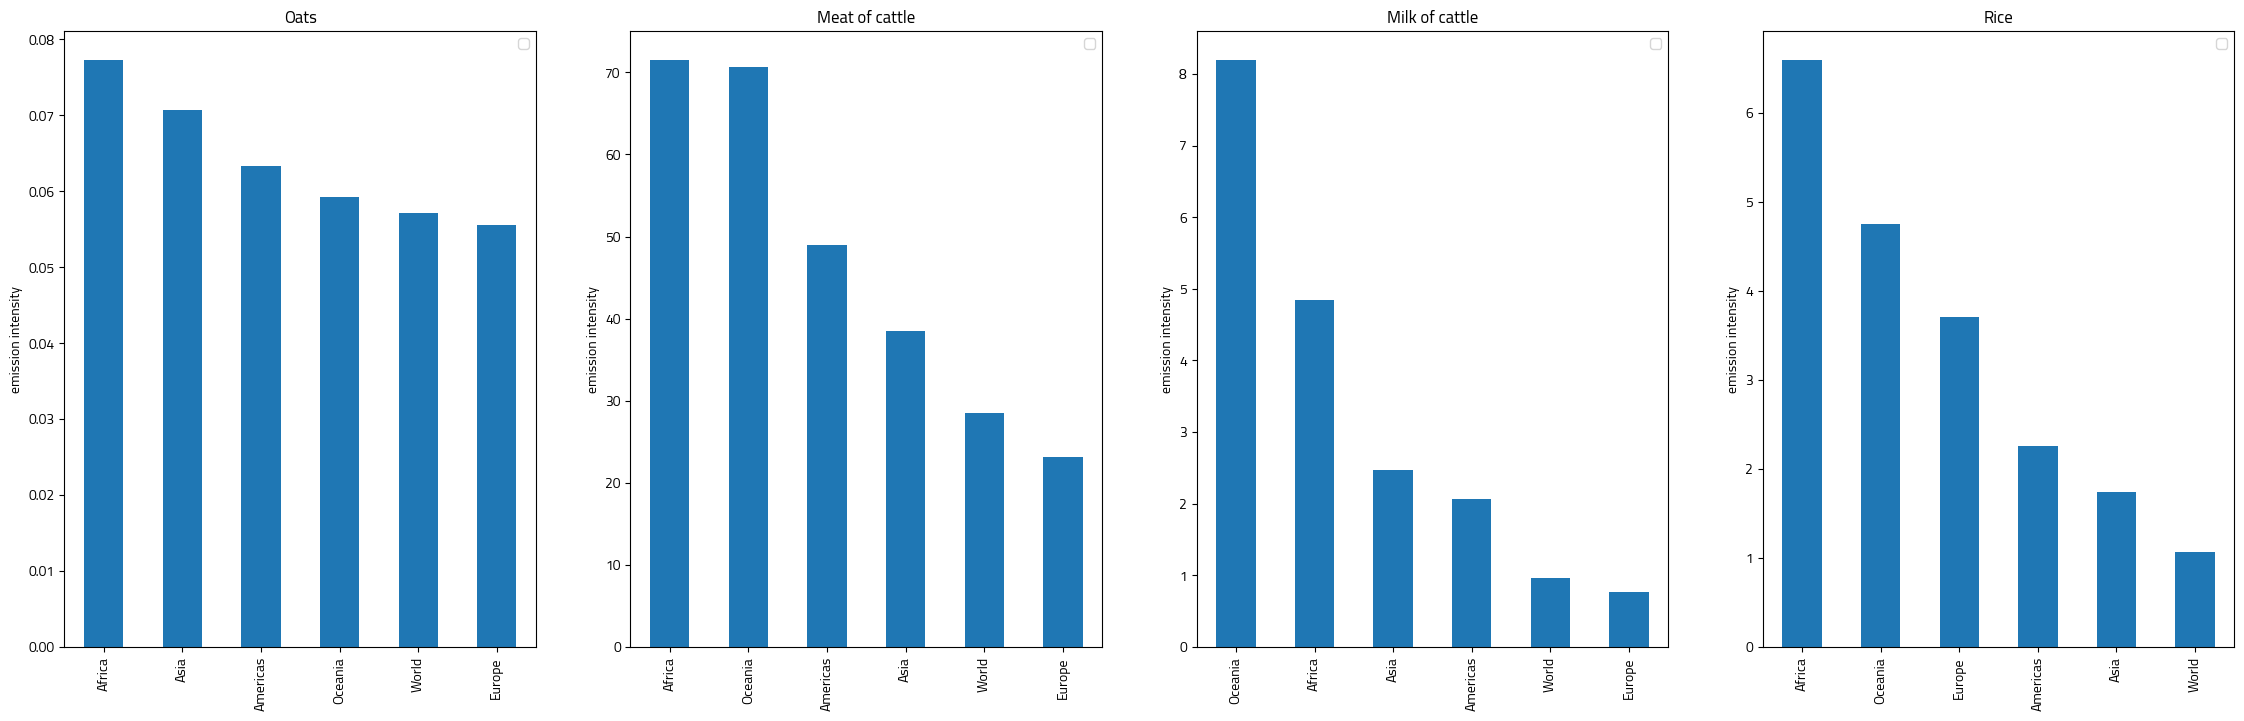

In [93]:
prod_emis_intensities_grouped_1 = prod_emis_intensities[prod_emis_intensities['item'] == 'Oats']
prod_emis_intensities_grouped_1 = prod_emis_intensities_grouped_1[['continent', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['continent'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=False)

prod_emis_intensities_grouped_2 = prod_emis_intensities[prod_emis_intensities['item'] == 'Meat of cattle with the bone, fresh or chilled']
prod_emis_intensities_grouped_2 = prod_emis_intensities_grouped_2[['continent', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['continent'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=False)

prod_emis_intensities_grouped_3 = prod_emis_intensities[prod_emis_intensities['item'] == 'Raw milk of cattle']
prod_emis_intensities_grouped_3 = prod_emis_intensities_grouped_3[['continent', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['continent'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=False)

prod_emis_intensities_grouped_4 = prod_emis_intensities[prod_emis_intensities['item'] == 'Rice']
prod_emis_intensities_grouped_4 = prod_emis_intensities_grouped_4[['continent', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['continent'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=False)

fig, axes = plt.subplots(1, 4, figsize=(28, 8))

prod_emis_intensities_grouped_1.plot.bar(x='continent', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[0])
axes[0].set_title('Oats')
axes[0].set_xlabel('')
axes[0].legend('')
axes[0].set_ylabel('emission intensity')

prod_emis_intensities_grouped_2.plot.bar(x='continent', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[1])
axes[1].set_title('Meat of cattle')
axes[1].set_xlabel('')
axes[1].legend('')
axes[1].set_ylabel('emission intensity')

prod_emis_intensities_grouped_3.plot.bar(x='continent', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[2])
axes[2].set_title('Milk of cattle')
axes[2].set_xlabel('')
axes[2].legend('')
axes[2].set_ylabel('emission intensity')

prod_emis_intensities_grouped_4.plot.bar(x='continent', y='emissions_intensity_combined_in_kg_co2eq_per_kg', ax=axes[3])
axes[3].set_title('Rice')
axes[3].set_xlabel('')
axes[3].legend('')
axes[3].set_ylabel('emission intensity')

Text(0.5, 1.0, 'Milk of cattle')

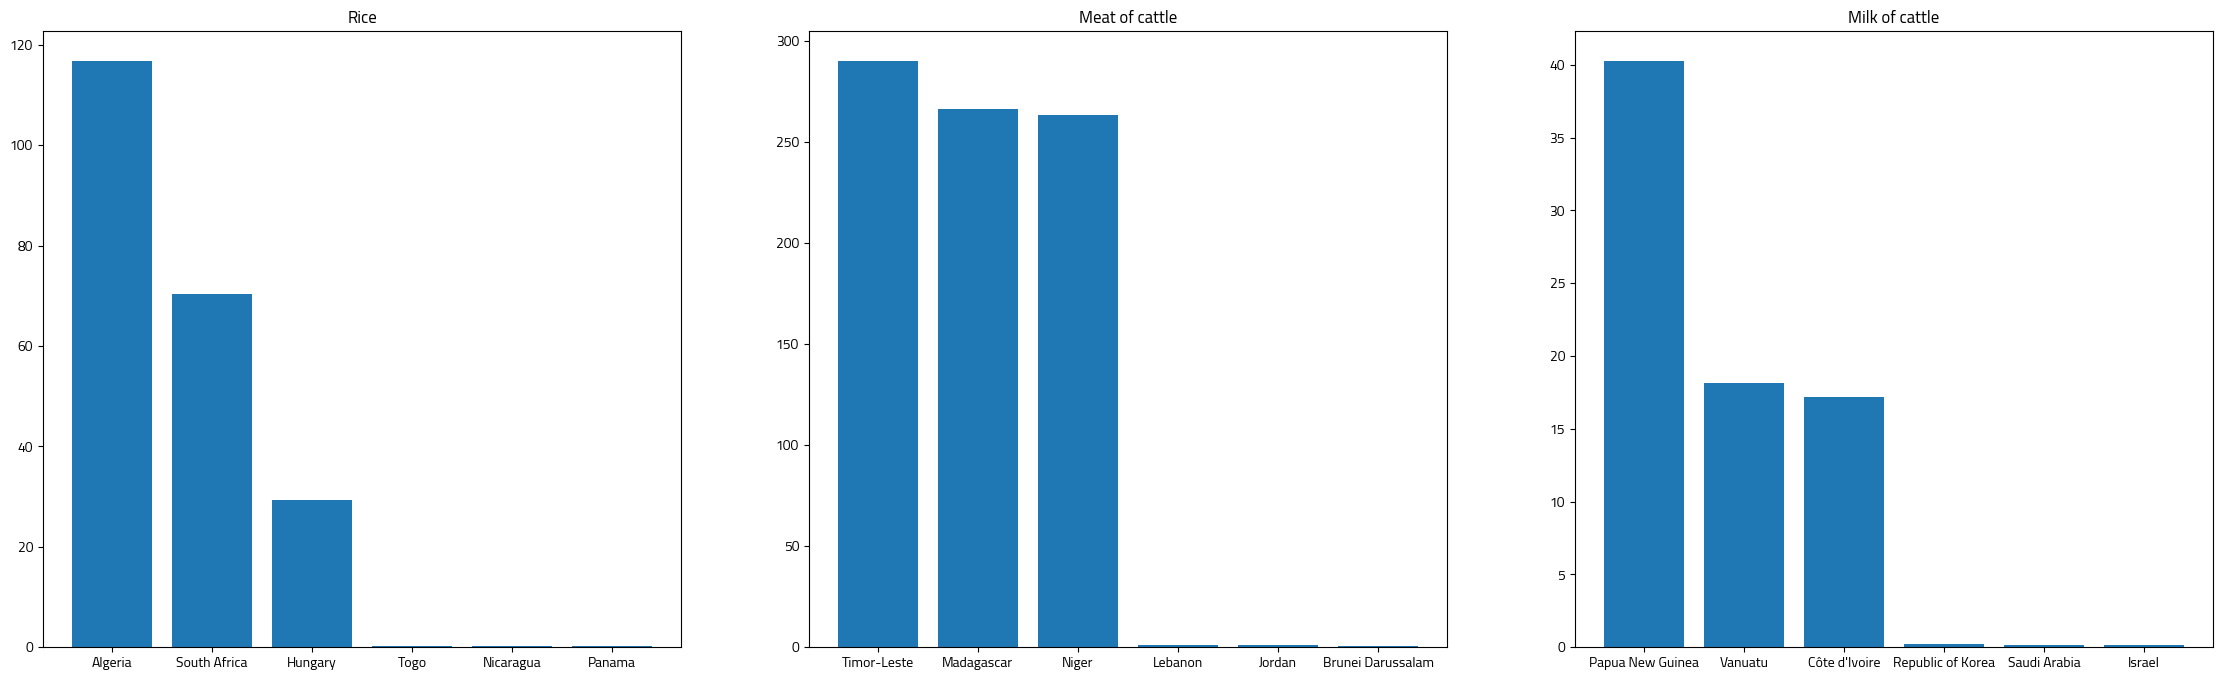

In [94]:
prod_emis_intensities_grouped_1 = prod_emis_intensities[(prod_emis_intensities['item'] == 'Rice') & (prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'].notnull()) & (prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'] != 0)]
prod_emis_intensities_grouped_1 = prod_emis_intensities_grouped_1[['country', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['country'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=False)

prod_emis_intensities_grouped_2 = prod_emis_intensities[(prod_emis_intensities['item'] == 'Meat of cattle with the bone, fresh or chilled') & (prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'].notnull()) & (prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'] != 0)]
prod_emis_intensities_grouped_2 = prod_emis_intensities_grouped_2[['country', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['country'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=False)

prod_emis_intensities_grouped_3 = prod_emis_intensities[(prod_emis_intensities['item'] == 'Raw milk of cattle') & (prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'].notnull()) & (prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'] != 0)]
prod_emis_intensities_grouped_3 = prod_emis_intensities_grouped_3[['country', 'emissions_intensity_combined_in_kg_co2eq_per_kg']].groupby(['country'], as_index=False).agg('mean').sort_values(by='emissions_intensity_combined_in_kg_co2eq_per_kg', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(28, 8))

axes[0].bar(prod_emis_intensities_grouped_1.head(3).country.tolist() + prod_emis_intensities_grouped_1.tail(3).country.tolist(), prod_emis_intensities_grouped_1.emissions_intensity_combined_in_kg_co2eq_per_kg.head(3).tolist() + prod_emis_intensities_grouped_1.emissions_intensity_combined_in_kg_co2eq_per_kg.tail(3).tolist())
axes[0].set_title('Rice')

axes[1].bar(prod_emis_intensities_grouped_2.head(3).country.tolist() + prod_emis_intensities_grouped_2.tail(3).country.tolist(), prod_emis_intensities_grouped_2.emissions_intensity_combined_in_kg_co2eq_per_kg.head(3).tolist() + prod_emis_intensities_grouped_2.emissions_intensity_combined_in_kg_co2eq_per_kg.tail(3).tolist())
axes[1].set_title('Meat of cattle')

axes[2].bar(prod_emis_intensities_grouped_3.head(3).country.tolist() + prod_emis_intensities_grouped_3.tail(3).country.tolist(), prod_emis_intensities_grouped_3.emissions_intensity_combined_in_kg_co2eq_per_kg.head(3).tolist() + prod_emis_intensities_grouped_3.emissions_intensity_combined_in_kg_co2eq_per_kg.tail(3).tolist())
axes[2].set_title('Milk of cattle')

In [100]:
prod_emis_intensities_boxplot = prod_emis_intensities[(prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'].notnull()) & (prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'] != 0)]
items = prod_emis_intensities_boxplot.item.unique().tolist()
items

['Barley',
 'Beans, dry',
 'Hen eggs in shell, fresh',
 'Maize (corn)',
 'Meat of cattle with the bone, fresh or chilled',
 'Meat of chickens, fresh or chilled',
 'Meat of pig with the bone, fresh or chilled',
 'Meat of sheep, fresh or chilled',
 'Millet',
 'Oats',
 'Potatoes',
 'Raw milk of cattle',
 'Raw milk of goats',
 'Raw milk of sheep',
 'Rice',
 'Rye',
 'Sorghum',
 'Wheat',
 'Meat of goat, fresh or chilled',
 'Sugar cane',
 'Meat of buffalo, fresh or chilled',
 'Raw milk of buffalo',
 'Soya beans',
 'Raw milk of camel']

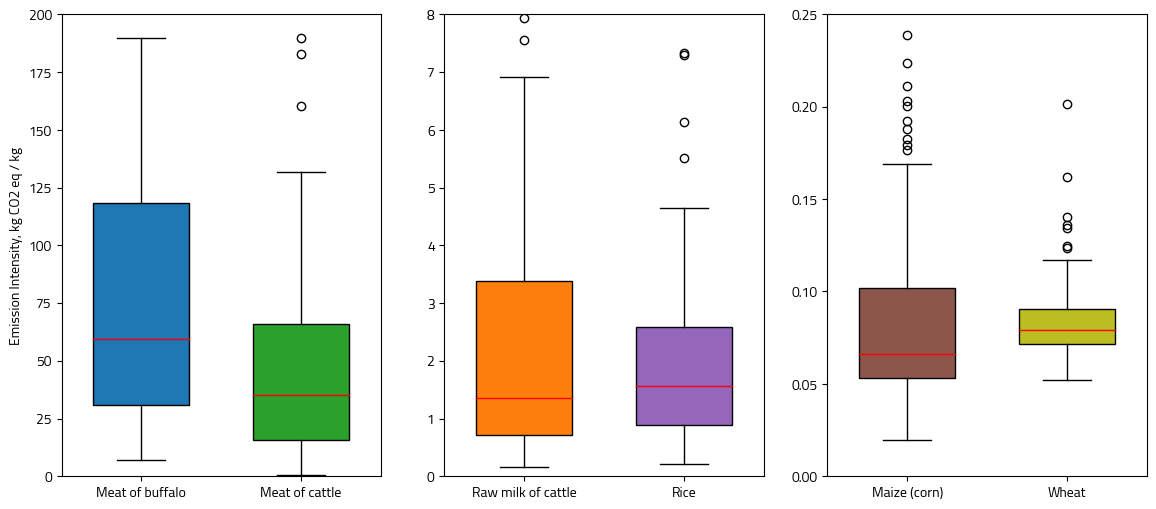

In [106]:
prod_emis_intensities_boxplot = prod_emis_intensities[(prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'].notnull()) & (prod_emis_intensities['emissions_intensity_combined_in_kg_co2eq_per_kg'] != 0)]
                                                           
prod_emis_intensities_1 = prod_emis_intensities_boxplot[(prod_emis_intensities_boxplot.item.isin(['Meat of buffalo, fresh or chilled', 'Meat of cattle with the bone, fresh or chilled']))]
prod_emis_intensities_2 = prod_emis_intensities_boxplot[(prod_emis_intensities_boxplot.item.isin(['Raw milk of cattle', 'Rice']))]
prod_emis_intensities_3 = prod_emis_intensities_boxplot[(prod_emis_intensities_boxplot.item.isin(['Wheat', 'Maize (corn)']))]

grouped_1 = prod_emis_intensities_1.groupby('item')['emissions_intensity_combined_in_kg_co2eq_per_kg']
grouped_2 = prod_emis_intensities_2.groupby('item')['emissions_intensity_combined_in_kg_co2eq_per_kg']
grouped_3 = prod_emis_intensities_3.groupby('item')['emissions_intensity_combined_in_kg_co2eq_per_kg']

fig, ax = plt.subplots(1, 3, figsize=(14, 6))

boxplot_1 = ax[0].boxplot(x=[group.values for name, group in grouped_1], labels=['Meat of buffalo', 'Meat of cattle'], widths=0.6, patch_artist=True,medianprops={'color': 'red'})
boxplot_2 = ax[1].boxplot(x=[group.values for name, group in grouped_2], labels=grouped_2.groups.keys(), widths=0.6, patch_artist=True,medianprops={'color': 'red'})
boxplot_3 = ax[2].boxplot(x=[group.values for name, group in grouped_3], labels=grouped_3.groups.keys(), widths=0.6, patch_artist=True,medianprops={'color': 'red'})

colors_1 = ['tab:blue', 'tab:green']
colors_2 = ['tab:orange', 'tab:purple']
colors_3 = ['tab:brown', 'tab:olive']

for box, color in zip(boxplot_1['boxes'], colors_1): box.set_facecolor(color)
for box, color in zip(boxplot_2['boxes'], colors_2): box.set_facecolor(color)
for box, color in zip(boxplot_3['boxes'], colors_3): box.set_facecolor(color)

ax[0].set_ylim(0,200)
ax[1].set_ylim(0,8)
ax[2].set_ylim(0,0.25)

ax[0].set_ylabel('Emission Intensity, kg CO2 eq / kg')

plt.show()